## Preliminary (libraries, cache, functions, color palettes)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-notebook')
import fastf1
from fastf1.core import Laps
import os
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
import utilities as ut 

In [4]:
#Generating cache folder
cache_folder = 'cache_folder'
if not os.path.exists(cache_folder):
    os.makedirs(cache_folder)

fastf1.Cache.enable_cache(cache_folder)

In [5]:
#Extract season2025 events list 
#just for reference, not used later
season2025 = fastf1.get_event_schedule(2025)
season2025.head()

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2025,2025-02-28,Pre-Season Testing,testing,Practice 1,2025-02-26 10:00:00+03:00,2025-02-26 07:00:00,...,Practice 3,2025-02-28 10:00:00+03:00,2025-02-28 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Australia,Melbourne,FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX ...,2025-03-16,Australian Grand Prix,conventional,Practice 1,2025-03-14 12:30:00+11:00,2025-03-14 01:30:00,...,Practice 3,2025-03-15 12:30:00+11:00,2025-03-15 01:30:00,Qualifying,2025-03-15 16:00:00+11:00,2025-03-15 05:00:00,Race,2025-03-16 15:00:00+11:00,2025-03-16 04:00:00,True
2,2,China,Shanghai,FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025,2025-03-23,Chinese Grand Prix,sprint_qualifying,Practice 1,2025-03-21 11:30:00+08:00,2025-03-21 03:30:00,...,Sprint,2025-03-22 11:00:00+08:00,2025-03-22 03:00:00,Qualifying,2025-03-22 15:00:00+08:00,2025-03-22 07:00:00,Race,2025-03-23 15:00:00+08:00,2025-03-23 07:00:00,True
3,3,Japan,Suzuka,FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025,2025-04-06,Japanese Grand Prix,conventional,Practice 1,2025-04-04 11:30:00+09:00,2025-04-04 02:30:00,...,Practice 3,2025-04-05 11:30:00+09:00,2025-04-05 02:30:00,Qualifying,2025-04-05 15:00:00+09:00,2025-04-05 06:00:00,Race,2025-04-06 14:00:00+09:00,2025-04-06 05:00:00,True
4,4,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2025,2025-04-13,Bahrain Grand Prix,conventional,Practice 1,2025-04-11 14:30:00+03:00,2025-04-11 11:30:00,...,Practice 3,2025-04-12 15:30:00+03:00,2025-04-12 12:30:00,Qualifying,2025-04-12 19:00:00+03:00,2025-04-12 16:00:00,Race,2025-04-13 18:00:00+03:00,2025-04-13 15:00:00,True


In [6]:
team_colors = {
    "Alpine": "#F282B4",       # Pink
    "Aston Martin": "#037A68", # Green
    "Ferrari": "#821729",      # Burgundy
    "Haas F1 Team": "#EB0A1E",         # Red
    "Kick Sauber": "#53FC18",  # Bright Green
    "McLaren": "#FF8700",      # Papaya Orange
    "Mercedes": "#C8CCCE",     # Silver/Gray
    "Racing Bulls": "#FFFFFF", # White
    "Red Bull Racing": "#003773",     # Navy Blue
    "Williams": "#00A0DE",     # Blue
}
driver_colors = {
    # Red Bull Racing
    "VER": "#002D5A",  # Max Verstappen (Deep Navy Blue)
    "TSU": "#003F7D",  # Liam Lawson (Brighter Blue)

    # Ferrari
    "LEC": "#9B1B30",  # Charles Leclerc (Darker Burgundy)
    "HAM": "#C81D37",  # Lewis Hamilton (Brighter Red)

    # Mercedes
    "RUS": "#ACB2B5",  # George Russell (Dark Silver)
    "ANT": "#D0D3D4",  # Andrea Kimi Antonelli (Lighter Silver)

    # McLaren
    "NOR": "#FF9800",  # Lando Norris (Papaya Orange)
    "PIA": "#FFB766",  # Oscar Piastri (Lighter Papaya)

    # Aston Martin
    "ALO": "#028061",  # Fernando Alonso (Dark Green)
    "STR": "#03A678",  # Lance Stroll (Lighter Green)

    # Alpine
    "GAS": "#FF66A1",  # Pierre Gasly (Light Pink)
    "DOO": "#D94A90",  # Jack Doohan (Darker Pink)

    # Williams
    "ALB": "#0096C9",  # Alexander Albon (Deep Blue)
    "SAI": "#00B6F1",  # Carlos Sainz (Sky Blue)

    # Racing Bulls
    "HAD": "#E5E5E5",  # Isack Hadjar (Light Gray)
    "LAW": "#FFFFFF",  # Yuki Tsunoda (White)

    # Kick Sauber
    "HUL": "#4EF535",  # Nico Hülkenberg (Bright Green)
    "BOR": "#26D401",  # Gabriel Bortoleto (Darker Green)

    # Haas
    "OCO": "#D91A26",  # Esteban Ocon (Dark Red)
    "BEA": "#F52439",  # Oliver Bearman (Brighter Red)
}

## FP1

In [7]:
fp1 = fastf1.get_session(2025,'Japan','FP1')
fp1.load()
fp1

core           INFO 	Loading data for Japanese Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '44', '55', '62', '63', '81', '87']


2025 Season Round 3: Japanese Grand Prix - Practice 1

In [8]:
df_fp1 = fp1.laps
df_fp1.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:51.339000,VER,1,NaT,1.0,1.0,0 days 00:15:40.724000,NaT,NaT,0 days 00:01:00.664000,...,True,Red Bull Racing,0 days 00:15:40.724000,2025-04-04 02:30:43.208,1,NaN,False,,False,False
1,0 days 00:19:22.077000,VER,1,0 days 00:01:30.738000,2.0,1.0,NaT,NaT,0 days 00:00:31.570000,0 days 00:00:41.266000,...,True,Red Bull Racing,0 days 00:17:51.339000,2025-04-04 02:32:53.823,1,NaN,False,,False,True
2,0 days 00:22:20.899000,VER,1,NaT,3.0,1.0,NaT,NaT,0 days 00:01:07.148000,0 days 00:01:20.790000,...,True,Red Bull Racing,0 days 00:19:22.077000,2025-04-04 02:34:24.561,1,NaN,False,,False,False
3,0 days 00:23:50.589000,VER,1,0 days 00:01:29.690000,4.0,1.0,NaT,NaT,0 days 00:00:31.066000,0 days 00:00:40.904000,...,True,Red Bull Racing,0 days 00:22:20.899000,2025-04-04 02:37:23.383,1,NaN,False,,False,True
4,0 days 00:26:20.118000,VER,1,0 days 00:02:29.529000,5.0,1.0,NaT,0 days 00:26:18.912000,0 days 00:00:53.131000,0 days 00:01:06.143000,...,True,Red Bull Racing,0 days 00:23:50.589000,2025-04-04 02:38:53.073,1,NaN,False,,False,False


In [9]:
df_fp1['Deleted'].value_counts()

Deleted
False    497
Name: count, dtype: int64

In [10]:
df_fp1['FreshTyre'].value_counts()

FreshTyre
False    275
True     222
Name: count, dtype: int64

In [11]:
df_fp1 = df_fp1[['Team','Driver','DriverNumber','Compound','LapTime','LapNumber','SpeedST','Stint','FreshTyre']]

In [12]:
df_fp1.isnull().sum()

Team              0
Driver            0
DriverNumber      0
Compound          0
LapTime         111
LapNumber         0
SpeedST           0
Stint             0
FreshTyre         0
dtype: int64

In [13]:
df_fp1 = df_fp1[df_fp1['LapTime'].isnull()==False]

In [14]:
df_fp1['LapTimeInSeconds'] = df_fp1['LapTime'].dt.total_seconds()

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/653262970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fp1['LapTimeInSeconds'] = df_fp1['LapTime'].dt.total_seconds()


In [15]:
df_fp1['Driver'].value_counts()

Driver
HAD    25
SAI    23
LAW    23
LEC    22
RUS    22
PIA    22
BOR    21
ANT    21
ALO    20
ALB    20
STR    19
GAS    19
HIR    18
VER    18
HAM    18
NOR    17
HUL    17
TSU    17
OCO    14
BEA    10
Name: count, dtype: int64

In [16]:
lec = df_fp1[df_fp1['Driver']=='LEC']
lec.shape

(22, 10)

In [17]:
lec

,Team,Driver,DriverNumber,Compound,LapTime,LapNumber,SpeedST,Stint,FreshTyre,LapTimeInSeconds
178,Ferrari,LEC,16,MEDIUM,0 days 00:01:32.771000,2.0,303.0,1.0,True,92.771
179,Ferrari,LEC,16,MEDIUM,0 days 00:02:29.221000,3.0,281.0,1.0,True,149.221
180,Ferrari,LEC,16,MEDIUM,0 days 00:01:30.769000,4.0,302.0,1.0,True,90.769
182,Ferrari,LEC,16,MEDIUM,0 days 00:01:30.561000,6.0,302.0,1.0,True,90.561
183,Ferrari,LEC,16,MEDIUM,0 days 00:02:21.499000,7.0,240.0,1.0,True,141.499
184,Ferrari,LEC,16,MEDIUM,0 days 00:01:30.003000,8.0,301.0,1.0,True,90.003
185,Ferrari,LEC,16,MEDIUM,0 days 00:02:04.935000,9.0,200.0,1.0,True,124.935
187,Ferrari,LEC,16,SOFT,0 days 00:02:25.155000,11.0,253.0,2.0,True,145.155
188,Ferrari,LEC,16,SOFT,0 days 00:01:28.965000,12.0,305.0,2.0,True,88.965
189,Ferrari,LEC,16,SOFT,0 days 00:02:26.629000,13.0,143.0,2.0,True,146.629


In [18]:
lec_threshold = lec['LapTimeInSeconds'].median()*1.07
lec_threshold

100.17821500000001

In [19]:
lec_good = lec[lec['LapTimeInSeconds']<=lec_threshold]

In [20]:
lec_stint_3 = lec_good[(lec_good['Stint']==3.0)]
i = lec_stint_3[lec_stint_3['LapNumber']==19.0].index
lec_stint_3.drop(index=i,inplace=True)
lec_stint_3

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/2128145224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lec_stint_3.drop(index=i,inplace=True)


,Team,Driver,DriverNumber,Compound,LapTime,LapNumber,SpeedST,Stint,FreshTyre,LapTimeInSeconds
193,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.504000,17.0,301.0,3.0,False,93.504
194,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.223000,18.0,298.0,3.0,False,93.223
196,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.719000,20.0,298.0,3.0,False,93.719
197,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.524000,21.0,301.0,3.0,False,93.524
198,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.294000,22.0,303.0,3.0,False,93.294
199,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.530000,23.0,304.0,3.0,False,93.530
200,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.869000,24.0,302.0,3.0,False,93.869
201,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.866000,25.0,303.0,3.0,False,93.866


<Axes: xlabel='LapNumber', ylabel='LapTimeInSeconds'>

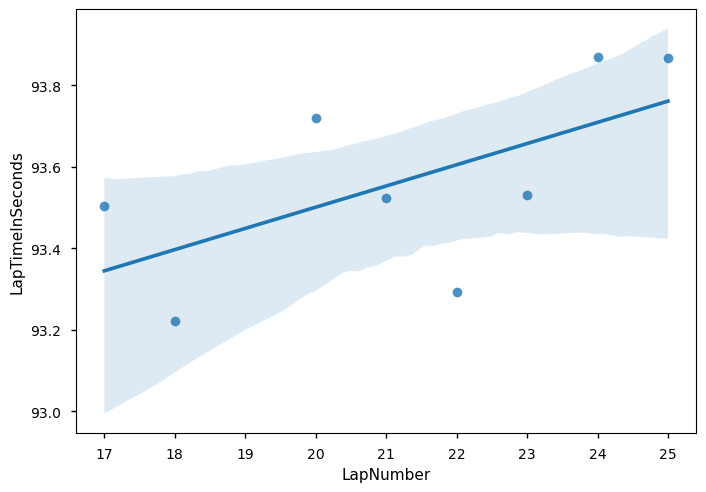

In [21]:
sns.regplot(data=lec_stint_3,x='LapNumber',y='LapTimeInSeconds')

In [22]:
from sklearn.linear_model import LinearRegression
X = lec_stint_3[['LapNumber']]
x = lec_stint_3['LapNumber']
y = lec_stint_3['LapTimeInSeconds']

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X,y)

LinearRegression()

In [25]:
X

,LapNumber
193,17.0
194,18.0
196,20.0
197,21.0
198,22.0
199,23.0
200,24.0
201,25.0


In [26]:
y

193    93.504
194    93.223
196    93.719
197    93.524
198    93.294
199    93.530
200    93.869
201    93.866
Name: LapTimeInSeconds, dtype: float64

In [27]:
yhat = lm.predict(X)
yhat

array([93.34491441, 93.39696396, 93.50106306, 93.55311261, 93.60516216,
       93.65721171, 93.70926126, 93.76131081])

In [28]:
lm.intercept_

92.46007207207208

In [29]:
lm.coef_

array([0.05204955])

In [30]:
lec_stint_3

,Team,Driver,DriverNumber,Compound,LapTime,LapNumber,SpeedST,Stint,FreshTyre,LapTimeInSeconds
193,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.504000,17.0,301.0,3.0,False,93.504
194,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.223000,18.0,298.0,3.0,False,93.223
196,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.719000,20.0,298.0,3.0,False,93.719
197,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.524000,21.0,301.0,3.0,False,93.524
198,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.294000,22.0,303.0,3.0,False,93.294
199,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.530000,23.0,304.0,3.0,False,93.530
200,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.869000,24.0,302.0,3.0,False,93.869
201,Ferrari,LEC,16,MEDIUM,0 days 00:01:33.866000,25.0,303.0,3.0,False,93.866


<Figure size 1000x1200 with 0 Axes>

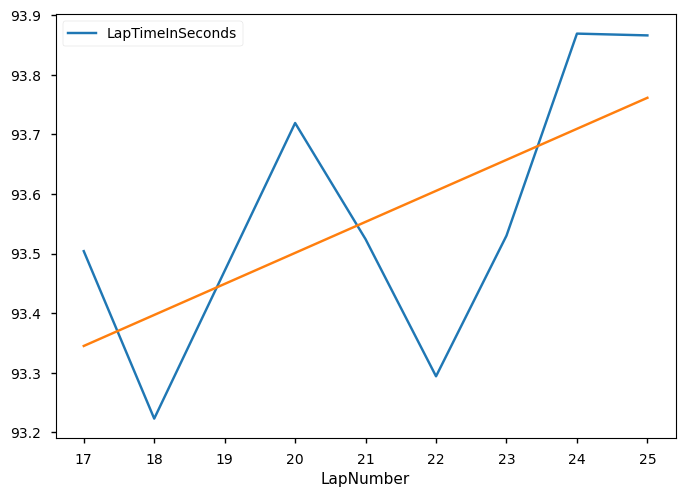

In [31]:
plt.figure(figsize=(10,12))
lec_stint_3.plot(kind='line',x='LapNumber',y='LapTimeInSeconds')
plt.plot(lec_stint_3['LapNumber'],yhat)

In [32]:
f = np.polyfit(x, y, 5)
p = np.poly1d(f)
print(p)

           5          4         3       2
-0.003103 x + 0.3265 x - 13.68 x + 285 x - 2955 x + 1.229e+04


In [33]:
p(X)

array([[93.50201176],
       [93.22894878],
       [93.70541687],
       [93.52288489],
       [93.33742567],
       [93.4729912 ],
       [93.89938113],
       [93.8599397 ]])

<Figure size 1000x1200 with 0 Axes>

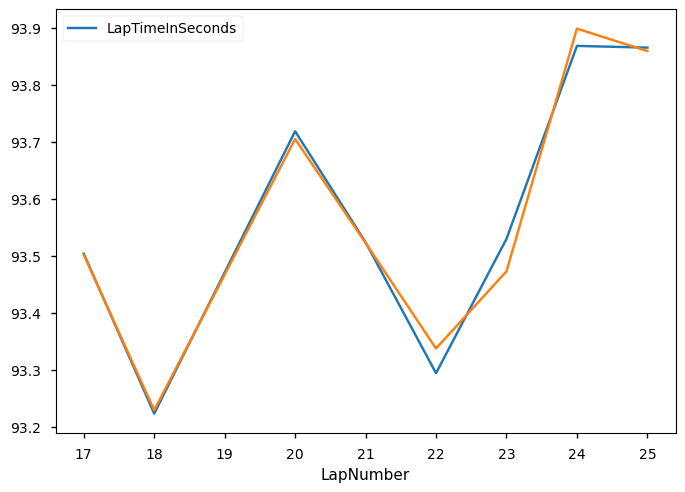

In [34]:
plt.figure(figsize=(10,12))
lec_stint_3.plot(kind='line',x='LapNumber',y='LapTimeInSeconds')
plt.plot(lec_stint_3['LapNumber'],p(X))

## Race Tyre Compound Comparison

In [35]:
race = fastf1.get_session(2025,'Japan','R')
race.load()

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '44', '6', '23', '87', '14', '22', '10', '55', '7', '27', '30', '31', '5', '18']


In [36]:
race_df = race.laps

In [37]:
race_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:41.632000,VER,1,0 days 00:01:34.725000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.962000,...,True,Red Bull Racing,0 days 00:56:06.651000,2025-04-06 05:03:47.081,1,1.0,False,,False,False
1,0 days 00:59:15.575000,VER,1,0 days 00:01:33.943000,2.0,1.0,NaT,NaT,0 days 00:00:33.894000,0 days 00:00:42.026000,...,True,Red Bull Racing,0 days 00:57:41.632000,2025-04-06 05:05:22.062,1,1.0,False,,False,True
2,0 days 01:00:49.214000,VER,1,0 days 00:01:33.639000,3.0,1.0,NaT,NaT,0 days 00:00:33.567000,0 days 00:00:42.027000,...,True,Red Bull Racing,0 days 00:59:15.575000,2025-04-06 05:06:56.005,1,1.0,False,,False,True
3,0 days 01:02:22.958000,VER,1,0 days 00:01:33.744000,4.0,1.0,NaT,NaT,0 days 00:00:33.570000,0 days 00:00:42.140000,...,True,Red Bull Racing,0 days 01:00:49.214000,2025-04-06 05:08:29.644,1,1.0,False,,False,True
4,0 days 01:03:56.734000,VER,1,0 days 00:01:33.776000,5.0,1.0,NaT,NaT,0 days 00:00:33.486000,0 days 00:00:42.157000,...,True,Red Bull Racing,0 days 01:02:22.958000,2025-04-06 05:10:03.388,1,1.0,False,,False,True


In [38]:
race_df.isnull().sum()

Time                     0
Driver                   0
DriverNumber             0
LapTime                  0
LapNumber                0
Stint                    0
PitOutTime            1038
PitInTime             1038
Sector1Time             20
Sector2Time              0
Sector3Time              0
Sector1SessionTime      26
Sector2SessionTime       0
Sector3SessionTime       0
SpeedI1                250
SpeedI2                  0
SpeedFL                 21
SpeedST                  0
IsPersonalBest           0
Compound                 0
TyreLife                 0
FreshTyre                0
Team                     0
LapStartTime             0
LapStartDate             0
TrackStatus              0
Position                 0
Deleted                  0
DeletedReason            0
FastF1Generated          0
IsAccurate               0
dtype: int64

In [39]:
race_df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [40]:
race_df['PitLap'] = ((race_df['PitInTime'].dt.total_seconds()>0) | (race_df['PitOutTime'].dt.total_seconds()>0)).astype(int)
race_df

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitLap
0,0 days 00:57:41.632000,VER,1,0 days 00:01:34.725000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.962000,...,Red Bull Racing,0 days 00:56:06.651000,2025-04-06 05:03:47.081,1,1.0,False,,False,False,0
1,0 days 00:59:15.575000,VER,1,0 days 00:01:33.943000,2.0,1.0,NaT,NaT,0 days 00:00:33.894000,0 days 00:00:42.026000,...,Red Bull Racing,0 days 00:57:41.632000,2025-04-06 05:05:22.062,1,1.0,False,,False,True,0
2,0 days 01:00:49.214000,VER,1,0 days 00:01:33.639000,3.0,1.0,NaT,NaT,0 days 00:00:33.567000,0 days 00:00:42.027000,...,Red Bull Racing,0 days 00:59:15.575000,2025-04-06 05:06:56.005,1,1.0,False,,False,True,0
3,0 days 01:02:22.958000,VER,1,0 days 00:01:33.744000,4.0,1.0,NaT,NaT,0 days 00:00:33.570000,0 days 00:00:42.140000,...,Red Bull Racing,0 days 01:00:49.214000,2025-04-06 05:08:29.644,1,1.0,False,,False,True,0
4,0 days 01:03:56.734000,VER,1,0 days 00:01:33.776000,5.0,1.0,NaT,NaT,0 days 00:00:33.486000,0 days 00:00:42.157000,...,Red Bull Racing,0 days 01:02:22.958000,2025-04-06 05:10:03.388,1,1.0,False,,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0 days 02:12:18.030000,STR,18,0 days 00:01:32.545000,48.0,3.0,NaT,NaT,0 days 00:00:32.199000,0 days 00:00:42.172000,...,Aston Martin,0 days 02:10:45.485000,2025-04-06 06:18:25.915,1,20.0,False,,False,True,0
1055,0 days 02:13:50.404000,STR,18,0 days 00:01:32.374000,49.0,3.0,NaT,NaT,0 days 00:00:32.143000,0 days 00:00:42.060000,...,Aston Martin,0 days 02:12:18.030000,2025-04-06 06:19:58.460,1,20.0,False,,False,True,0
1056,0 days 02:15:22.621000,STR,18,0 days 00:01:32.217000,50.0,3.0,NaT,NaT,0 days 00:00:31.968000,0 days 00:00:42.084000,...,Aston Martin,0 days 02:13:50.404000,2025-04-06 06:21:30.834,1,20.0,False,,False,True,0
1057,0 days 02:16:54.767000,STR,18,0 days 00:01:32.146000,51.0,3.0,NaT,NaT,0 days 00:00:31.901000,0 days 00:00:42.103000,...,Aston Martin,0 days 02:15:22.621000,2025-04-06 06:23:03.051,1,20.0,False,,False,True,0


In [41]:
race_df = race_df[['Driver','DriverNumber','LapTime','LapNumber','Stint','Compound','TyreLife','Team','PitLap']]
race_df.head()

,Driver,DriverNumber,LapTime,LapNumber,Stint,Compound,TyreLife,Team,PitLap
0,VER,1,0 days 00:01:34.725000,1.0,1.0,MEDIUM,1.0,Red Bull Racing,0
1,VER,1,0 days 00:01:33.943000,2.0,1.0,MEDIUM,2.0,Red Bull Racing,0
2,VER,1,0 days 00:01:33.639000,3.0,1.0,MEDIUM,3.0,Red Bull Racing,0
3,VER,1,0 days 00:01:33.744000,4.0,1.0,MEDIUM,4.0,Red Bull Racing,0
4,VER,1,0 days 00:01:33.776000,5.0,1.0,MEDIUM,5.0,Red Bull Racing,0


In [42]:
race_df['LapTimeInSeconds'] = race_df['LapTime'].dt.total_seconds()

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/2278180307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df['LapTimeInSeconds'] = race_df['LapTime'].dt.total_seconds()


In [43]:
race_df.head()

,Driver,DriverNumber,LapTime,LapNumber,Stint,Compound,TyreLife,Team,PitLap,LapTimeInSeconds
0,VER,1,0 days 00:01:34.725000,1.0,1.0,MEDIUM,1.0,Red Bull Racing,0,94.725
1,VER,1,0 days 00:01:33.943000,2.0,1.0,MEDIUM,2.0,Red Bull Racing,0,93.943
2,VER,1,0 days 00:01:33.639000,3.0,1.0,MEDIUM,3.0,Red Bull Racing,0,93.639
3,VER,1,0 days 00:01:33.744000,4.0,1.0,MEDIUM,4.0,Red Bull Racing,0,93.744
4,VER,1,0 days 00:01:33.776000,5.0,1.0,MEDIUM,5.0,Red Bull Racing,0,93.776


In [44]:
race_df['Compound'].value_counts()

Compound
HARD      543
MEDIUM    452
SOFT       64
Name: count, dtype: int64

In [45]:
race_df['Stint'].max()

3.0

In [46]:
medium_lp = race_df[race_df['Compound']=='MEDIUM']['LapTimeInSeconds']
medium_lp

0       94.725
1       93.943
2       93.639
3       93.744
4       93.776
         ...  
1054    92.545
1055    92.374
1056    92.217
1057    92.146
1058    92.052
Name: LapTimeInSeconds, Length: 452, dtype: float64

In [47]:
hard_lp = race_df[race_df['Compound']=='HARD']['LapTimeInSeconds']
hard_lp

21      114.078
22       92.682
23       92.291
24       92.506
25       92.448
         ...   
1032     94.258
1033     94.015
1034     94.126
1035     94.126
1036     95.972
Name: LapTimeInSeconds, Length: 543, dtype: float64

In [48]:
shapiro(medium_lp)

ShapiroResult(statistic=0.5441087484359741, pvalue=1.4407690425931162e-32)

In [49]:
mannwhitneyu(medium_lp,hard_lp)

MannwhitneyuResult(statistic=188118.5, pvalue=1.4005267844525093e-47)

<Axes: xlabel='Compound', ylabel='LapTimeInSeconds'>

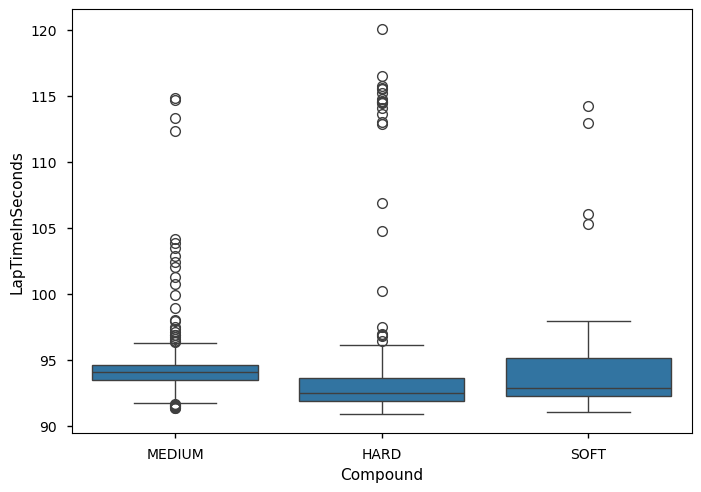

In [50]:
sns.boxplot(data=race_df,x='Compound',y='LapTimeInSeconds')

<Axes: xlabel='Compound', ylabel='LapTimeInSeconds'>

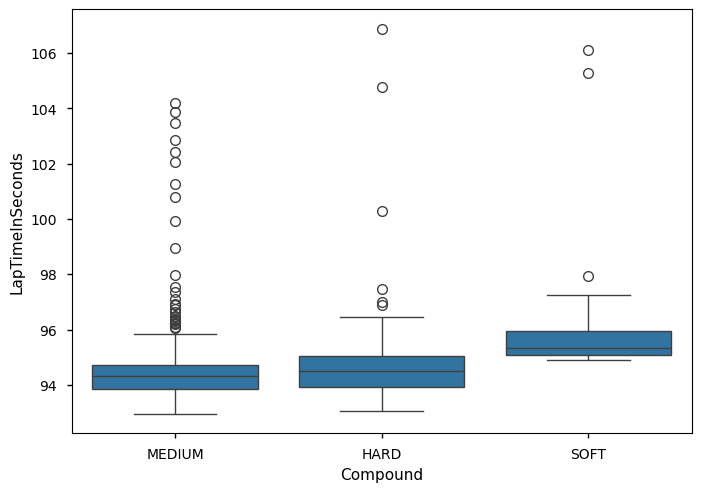

In [51]:
stint_1 = race_df[race_df['Stint']==1]
sns.boxplot(data=stint_1,x='Compound',y='LapTimeInSeconds')

In [52]:
stint_1['Compound'].value_counts()

Compound
MEDIUM    364
HARD       93
SOFT       24
Name: count, dtype: int64

In [53]:
stint_1[stint_1['Compound']=='HARD']['Driver'].unique()

array(['HAM', 'OCO', 'BOR'], dtype=object)

<Axes: xlabel='Compound', ylabel='LapTimeInSeconds'>

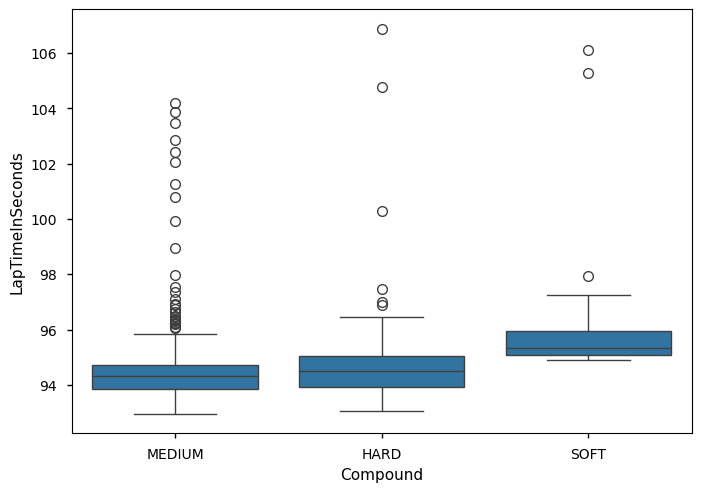

In [54]:
stint_2 = race_df[race_df['Stint']==2]
sns.boxplot(data=stint_1,x='Compound',y='LapTimeInSeconds')

In [55]:
stint_2['Compound'].value_counts()

Compound
HARD      450
MEDIUM     66
SOFT       40
Name: count, dtype: int64

In [56]:
stint_2[stint_2['Compound']=='MEDIUM']['Driver'].unique()

array(['HAM', 'OCO', 'BOR'], dtype=object)

In [57]:
stint_3 = race_df[race_df['Stint']==3]
print(stint_3['Compound'].value_counts())
print(stint_3['Driver'].unique())

Compound
MEDIUM    22
Name: count, dtype: int64
['STR']


<Axes: xlabel='LapNumber', ylabel='LapTimeInSeconds'>

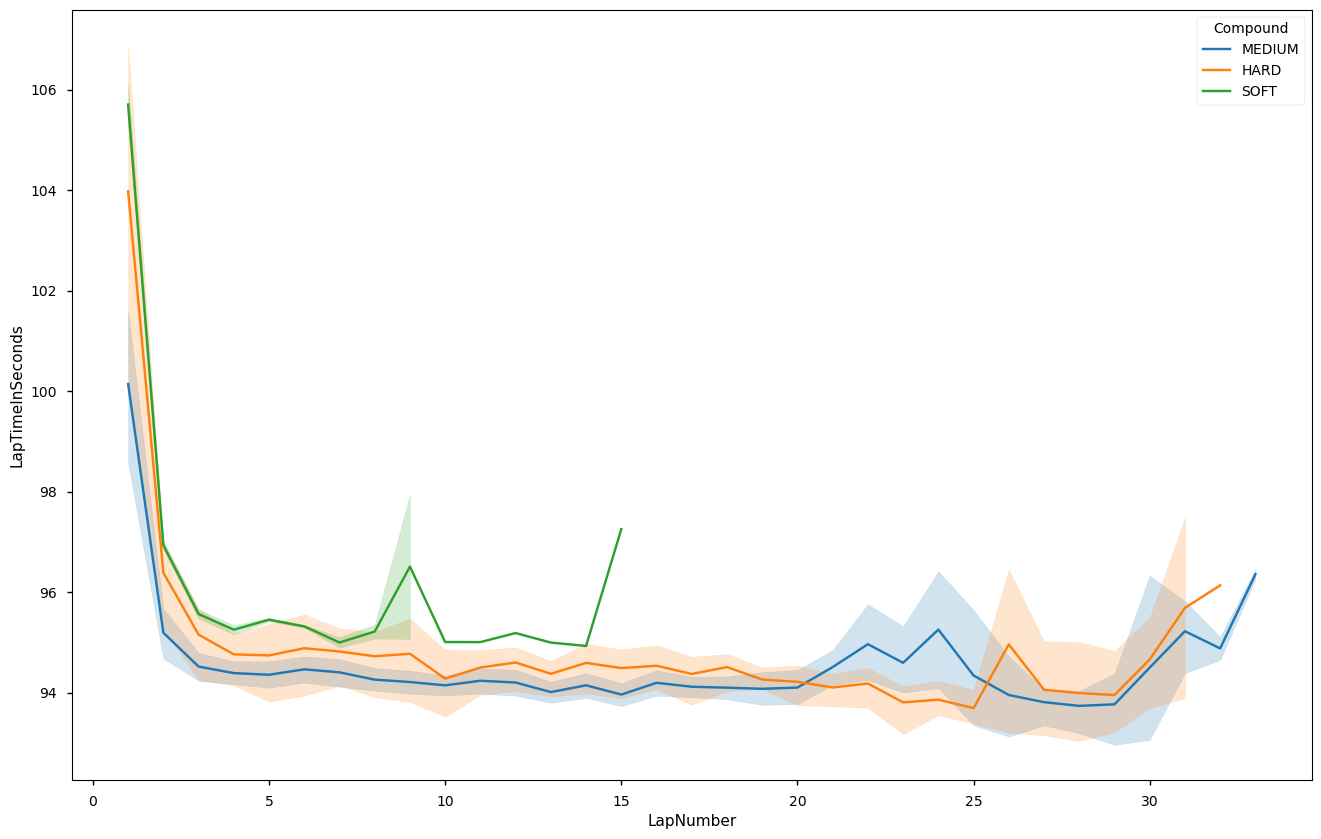

In [58]:
plt.figure(figsize=(16,10))
sns.lineplot(data=stint_1,x='LapNumber',y='LapTimeInSeconds',hue='Compound')

In [59]:
def compare_stint_lap_times(driver_abbr):
    df = race_df[((race_df['Driver']==driver_abbr) & (race_df['LapNumber']!=1))]
    df = df[df['PitLap']==0]
    df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*0.06
    fig = sns.lineplot(data=df,x='LapNumber',y='FuelCorrectedLapTime',hue='Compound')
    plt.title(driver_abbr)
    return df,fig

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/3218945024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*0.06


(   Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 1     VER            1 0 days 00:01:33.943000        2.0    1.0   MEDIUM   
 2     VER            1 0 days 00:01:33.639000        3.0    1.0   MEDIUM   
 3     VER            1 0 days 00:01:33.744000        4.0    1.0   MEDIUM   
 4     VER            1 0 days 00:01:33.776000        5.0    1.0   MEDIUM   
 5     VER            1 0 days 00:01:33.646000        6.0    1.0   MEDIUM   
 6     VER            1 0 days 00:01:33.526000        7.0    1.0   MEDIUM   
 7     VER            1 0 days 00:01:33.536000        8.0    1.0   MEDIUM   
 8     VER            1 0 days 00:01:33.529000        9.0    1.0   MEDIUM   
 9     VER            1 0 days 00:01:33.555000       10.0    1.0   MEDIUM   
 10    VER            1 0 days 00:01:33.498000       11.0    1.0   MEDIUM   
 11    VER            1 0 days 00:01:33.643000       12.0    1.0   MEDIUM   
 12    VER            1 0 days 00:01:33.640000       13.0    1.0   MEDIUM   

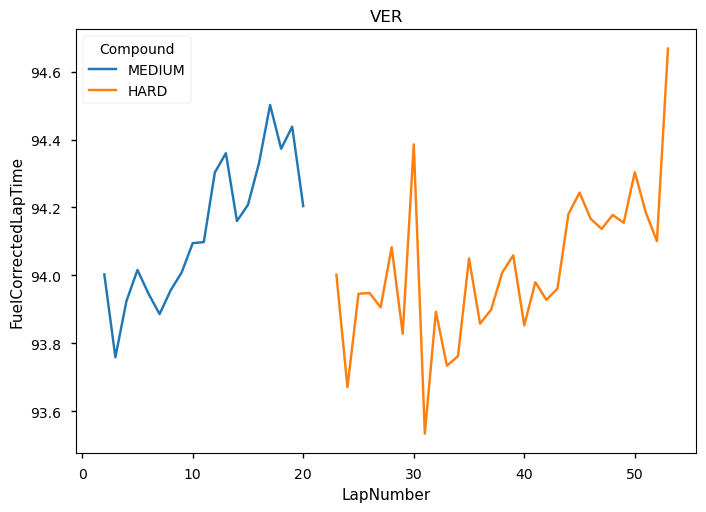

In [60]:
compare_stint_lap_times('VER')

In [61]:
ver = race_df[(race_df['Driver']=='VER')]

In [62]:
ver = ver[ver['LapTimeInSeconds']<(ver['LapTimeInSeconds'].median()*1.03)]
ver

,Driver,DriverNumber,LapTime,LapNumber,Stint,Compound,TyreLife,Team,PitLap,LapTimeInSeconds
0,VER,1,0 days 00:01:34.725000,1.0,1.0,MEDIUM,1.0,Red Bull Racing,0,94.725
1,VER,1,0 days 00:01:33.943000,2.0,1.0,MEDIUM,2.0,Red Bull Racing,0,93.943
2,VER,1,0 days 00:01:33.639000,3.0,1.0,MEDIUM,3.0,Red Bull Racing,0,93.639
3,VER,1,0 days 00:01:33.744000,4.0,1.0,MEDIUM,4.0,Red Bull Racing,0,93.744
4,VER,1,0 days 00:01:33.776000,5.0,1.0,MEDIUM,5.0,Red Bull Racing,0,93.776
5,VER,1,0 days 00:01:33.646000,6.0,1.0,MEDIUM,6.0,Red Bull Racing,0,93.646
6,VER,1,0 days 00:01:33.526000,7.0,1.0,MEDIUM,7.0,Red Bull Racing,0,93.526
7,VER,1,0 days 00:01:33.536000,8.0,1.0,MEDIUM,8.0,Red Bull Racing,0,93.536
8,VER,1,0 days 00:01:33.529000,9.0,1.0,MEDIUM,9.0,Red Bull Racing,0,93.529
9,VER,1,0 days 00:01:33.555000,10.0,1.0,MEDIUM,10.0,Red Bull Racing,0,93.555


<Axes: xlabel='LapNumber', ylabel='LapTimeInSeconds'>

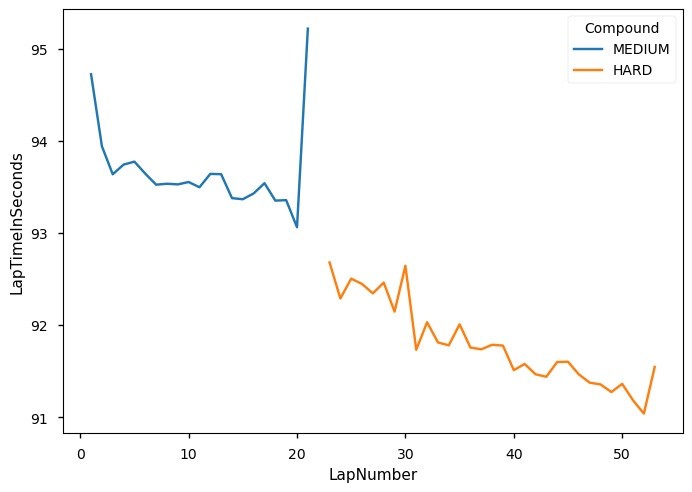

In [63]:
sns.lineplot(data=ver,x='LapNumber',y='LapTimeInSeconds',hue='Compound')

In [64]:
ver['FuelCorrectedLapTime'] = ver['LapTimeInSeconds']+(ver['LapNumber']-1)*0.06
ver

,Driver,DriverNumber,LapTime,LapNumber,Stint,Compound,TyreLife,Team,PitLap,LapTimeInSeconds,FuelCorrectedLapTime
0,VER,1,0 days 00:01:34.725000,1.0,1.0,MEDIUM,1.0,Red Bull Racing,0,94.725,94.725
1,VER,1,0 days 00:01:33.943000,2.0,1.0,MEDIUM,2.0,Red Bull Racing,0,93.943,94.003
2,VER,1,0 days 00:01:33.639000,3.0,1.0,MEDIUM,3.0,Red Bull Racing,0,93.639,93.759
3,VER,1,0 days 00:01:33.744000,4.0,1.0,MEDIUM,4.0,Red Bull Racing,0,93.744,93.924
4,VER,1,0 days 00:01:33.776000,5.0,1.0,MEDIUM,5.0,Red Bull Racing,0,93.776,94.016
5,VER,1,0 days 00:01:33.646000,6.0,1.0,MEDIUM,6.0,Red Bull Racing,0,93.646,93.946
6,VER,1,0 days 00:01:33.526000,7.0,1.0,MEDIUM,7.0,Red Bull Racing,0,93.526,93.886
7,VER,1,0 days 00:01:33.536000,8.0,1.0,MEDIUM,8.0,Red Bull Racing,0,93.536,93.956
8,VER,1,0 days 00:01:33.529000,9.0,1.0,MEDIUM,9.0,Red Bull Racing,0,93.529,94.009
9,VER,1,0 days 00:01:33.555000,10.0,1.0,MEDIUM,10.0,Red Bull Racing,0,93.555,94.095


<Axes: xlabel='LapNumber', ylabel='FuelCorrectedLapTime'>

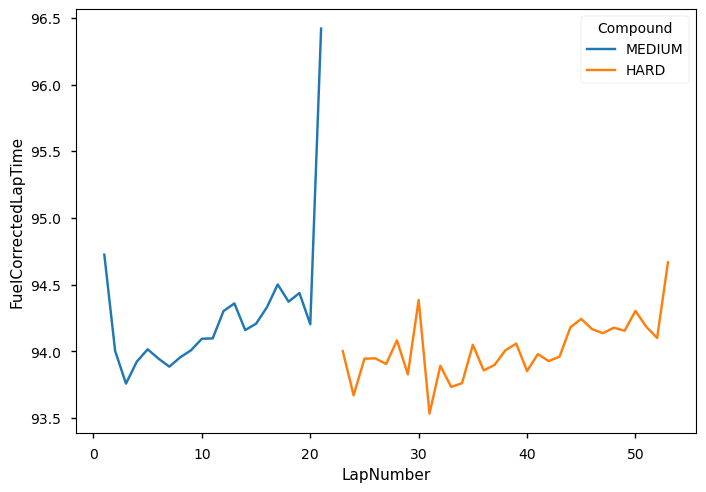

In [65]:
sns.lineplot(data=ver,x='LapNumber',y='FuelCorrectedLapTime',hue='Compound')

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/3218945024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*0.06


(   Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 1     VER            1 0 days 00:01:33.943000        2.0    1.0   MEDIUM   
 2     VER            1 0 days 00:01:33.639000        3.0    1.0   MEDIUM   
 3     VER            1 0 days 00:01:33.744000        4.0    1.0   MEDIUM   
 4     VER            1 0 days 00:01:33.776000        5.0    1.0   MEDIUM   
 5     VER            1 0 days 00:01:33.646000        6.0    1.0   MEDIUM   
 6     VER            1 0 days 00:01:33.526000        7.0    1.0   MEDIUM   
 7     VER            1 0 days 00:01:33.536000        8.0    1.0   MEDIUM   
 8     VER            1 0 days 00:01:33.529000        9.0    1.0   MEDIUM   
 9     VER            1 0 days 00:01:33.555000       10.0    1.0   MEDIUM   
 10    VER            1 0 days 00:01:33.498000       11.0    1.0   MEDIUM   
 11    VER            1 0 days 00:01:33.643000       12.0    1.0   MEDIUM   
 12    VER            1 0 days 00:01:33.640000       13.0    1.0   MEDIUM   

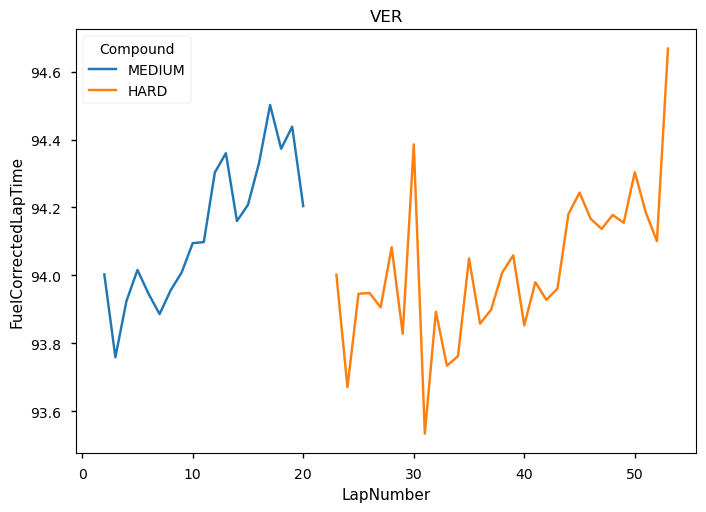

In [66]:
compare_stint_lap_times('VER')

(    Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 54     NOR            4 0 days 00:01:33.947000        2.0    1.0   MEDIUM   
 55     NOR            4 0 days 00:01:33.789000        3.0    1.0   MEDIUM   
 56     NOR            4 0 days 00:01:33.838000        4.0    1.0   MEDIUM   
 57     NOR            4 0 days 00:01:33.947000        5.0    1.0   MEDIUM   
 58     NOR            4 0 days 00:01:33.936000        6.0    1.0   MEDIUM   
 59     NOR            4 0 days 00:01:33.820000        7.0    1.0   MEDIUM   
 60     NOR            4 0 days 00:01:33.588000        8.0    1.0   MEDIUM   
 61     NOR            4 0 days 00:01:33.512000        9.0    1.0   MEDIUM   
 62     NOR            4 0 days 00:01:33.648000       10.0    1.0   MEDIUM   
 63     NOR            4 0 days 00:01:33.574000       11.0    1.0   MEDIUM   
 64     NOR            4 0 days 00:01:33.465000       12.0    1.0   MEDIUM   
 65     NOR            4 0 days 00:01:33.466000       13.0    1.

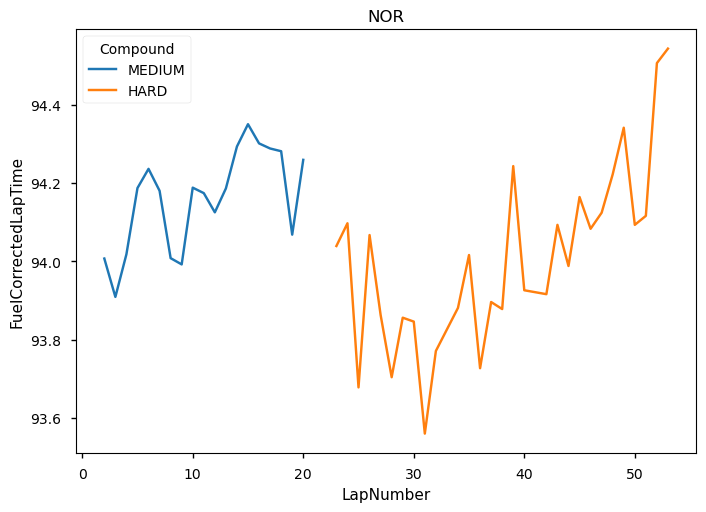

In [67]:
compare_stint_lap_times('NOR')

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/3218945024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*0.06


(    Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 107    PIA           81 0 days 00:01:34.084000        2.0    1.0   MEDIUM   
 108    PIA           81 0 days 00:01:34.042000        3.0    1.0   MEDIUM   
 109    PIA           81 0 days 00:01:33.699000        4.0    1.0   MEDIUM   
 110    PIA           81 0 days 00:01:33.967000        5.0    1.0   MEDIUM   
 111    PIA           81 0 days 00:01:33.831000        6.0    1.0   MEDIUM   
 112    PIA           81 0 days 00:01:33.849000        7.0    1.0   MEDIUM   
 113    PIA           81 0 days 00:01:33.772000        8.0    1.0   MEDIUM   
 114    PIA           81 0 days 00:01:33.590000        9.0    1.0   MEDIUM   
 115    PIA           81 0 days 00:01:34.175000       10.0    1.0   MEDIUM   
 116    PIA           81 0 days 00:01:33.479000       11.0    1.0   MEDIUM   
 117    PIA           81 0 days 00:01:33.334000       12.0    1.0   MEDIUM   
 118    PIA           81 0 days 00:01:33.253000       13.0    1.

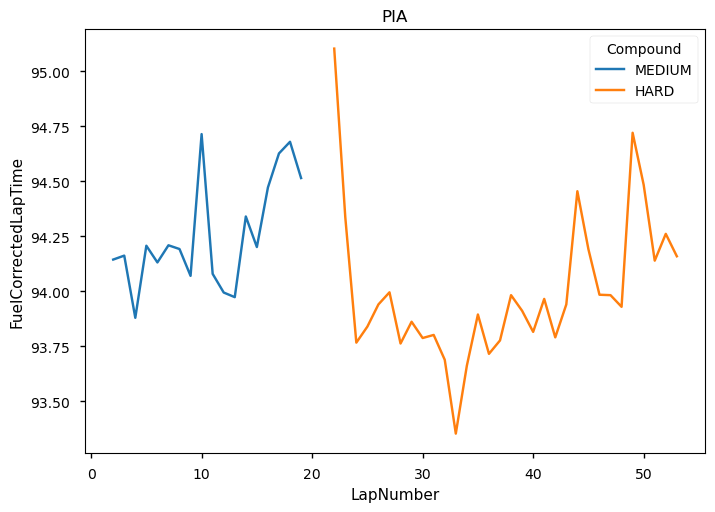

In [68]:
compare_stint_lap_times('PIA')

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/3218945024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*0.06


(    Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 160    LEC           16 0 days 00:01:34.121000        2.0    1.0   MEDIUM   
 161    LEC           16 0 days 00:01:34.129000        3.0    1.0   MEDIUM   
 162    LEC           16 0 days 00:01:33.954000        4.0    1.0   MEDIUM   
 163    LEC           16 0 days 00:01:33.878000        5.0    1.0   MEDIUM   
 164    LEC           16 0 days 00:01:33.879000        6.0    1.0   MEDIUM   
 165    LEC           16 0 days 00:01:33.897000        7.0    1.0   MEDIUM   
 166    LEC           16 0 days 00:01:33.787000        8.0    1.0   MEDIUM   
 167    LEC           16 0 days 00:01:34.055000        9.0    1.0   MEDIUM   
 168    LEC           16 0 days 00:01:33.827000       10.0    1.0   MEDIUM   
 169    LEC           16 0 days 00:01:33.664000       11.0    1.0   MEDIUM   
 170    LEC           16 0 days 00:01:33.777000       12.0    1.0   MEDIUM   
 171    LEC           16 0 days 00:01:33.413000       13.0    1.

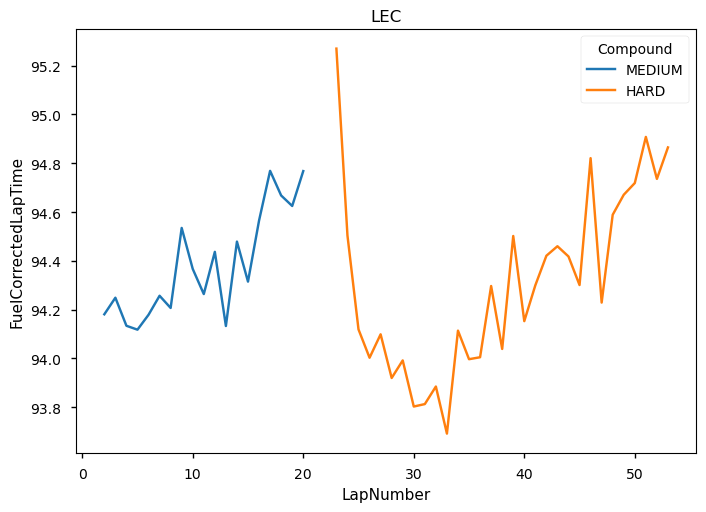

In [69]:
compare_stint_lap_times('LEC')

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/3218945024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*0.06


(    Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 213    RUS           63 0 days 00:01:34.191000        2.0    1.0   MEDIUM   
 214    RUS           63 0 days 00:01:34.204000        3.0    1.0   MEDIUM   
 215    RUS           63 0 days 00:01:34.057000        4.0    1.0   MEDIUM   
 216    RUS           63 0 days 00:01:33.795000        5.0    1.0   MEDIUM   
 217    RUS           63 0 days 00:01:33.922000        6.0    1.0   MEDIUM   
 218    RUS           63 0 days 00:01:34.181000        7.0    1.0   MEDIUM   
 219    RUS           63 0 days 00:01:33.798000        8.0    1.0   MEDIUM   
 220    RUS           63 0 days 00:01:33.816000        9.0    1.0   MEDIUM   
 221    RUS           63 0 days 00:01:33.603000       10.0    1.0   MEDIUM   
 222    RUS           63 0 days 00:01:33.883000       11.0    1.0   MEDIUM   
 223    RUS           63 0 days 00:01:33.864000       12.0    1.0   MEDIUM   
 224    RUS           63 0 days 00:01:33.815000       13.0    1.

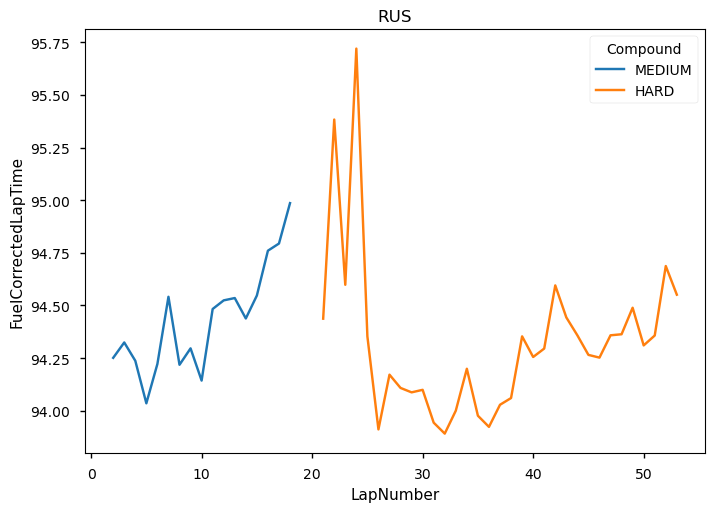

In [70]:
compare_stint_lap_times('RUS')

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/3218945024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*0.06


(    Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 266    ANT           12 0 days 00:01:34.531000        2.0    1.0   MEDIUM   
 267    ANT           12 0 days 00:01:34.123000        3.0    1.0   MEDIUM   
 268    ANT           12 0 days 00:01:34.260000        4.0    1.0   MEDIUM   
 269    ANT           12 0 days 00:01:33.790000        5.0    1.0   MEDIUM   
 270    ANT           12 0 days 00:01:34.057000        6.0    1.0   MEDIUM   
 271    ANT           12 0 days 00:01:33.841000        7.0    1.0   MEDIUM   
 272    ANT           12 0 days 00:01:34.018000        8.0    1.0   MEDIUM   
 273    ANT           12 0 days 00:01:33.882000        9.0    1.0   MEDIUM   
 274    ANT           12 0 days 00:01:33.721000       10.0    1.0   MEDIUM   
 275    ANT           12 0 days 00:01:34.220000       11.0    1.0   MEDIUM   
 276    ANT           12 0 days 00:01:34.182000       12.0    1.0   MEDIUM   
 277    ANT           12 0 days 00:01:33.768000       13.0    1.

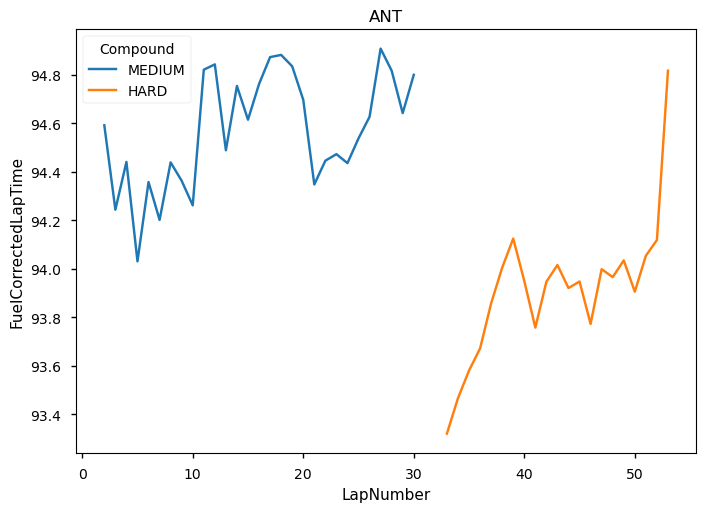

In [71]:
compare_stint_lap_times('ANT')

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/3218945024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*0.06


(    Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 372    HAD            6 0 days 00:01:34.750000        2.0    1.0   MEDIUM   
 373    HAD            6 0 days 00:01:34.166000        3.0    1.0   MEDIUM   
 374    HAD            6 0 days 00:01:34.277000        4.0    1.0   MEDIUM   
 375    HAD            6 0 days 00:01:34.296000        5.0    1.0   MEDIUM   
 376    HAD            6 0 days 00:01:35.455000        6.0    1.0   MEDIUM   
 377    HAD            6 0 days 00:01:34.427000        7.0    1.0   MEDIUM   
 378    HAD            6 0 days 00:01:33.990000        8.0    1.0   MEDIUM   
 379    HAD            6 0 days 00:01:34.164000        9.0    1.0   MEDIUM   
 380    HAD            6 0 days 00:01:33.959000       10.0    1.0   MEDIUM   
 381    HAD            6 0 days 00:01:34.239000       11.0    1.0   MEDIUM   
 382    HAD            6 0 days 00:01:34.085000       12.0    1.0   MEDIUM   
 383    HAD            6 0 days 00:01:34.027000       13.0    1.

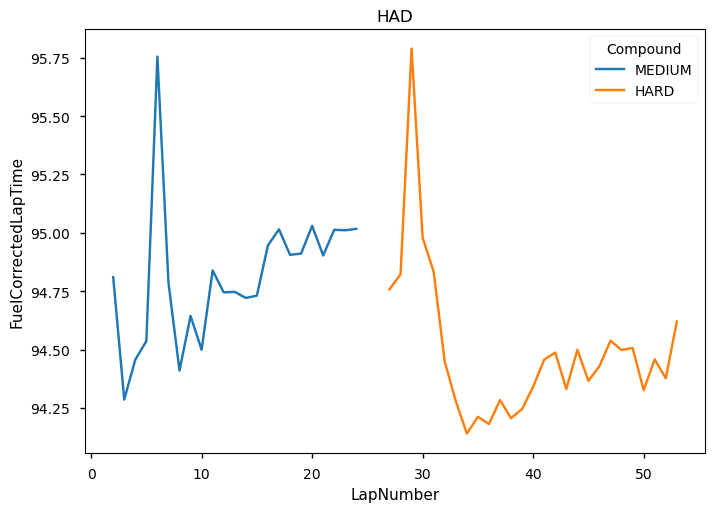

In [72]:
compare_stint_lap_times('HAD')

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/3218945024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*0.06


(    Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 425    ALB           23 0 days 00:01:35.445000        2.0    1.0   MEDIUM   
 426    ALB           23 0 days 00:01:34.501000        3.0    1.0   MEDIUM   
 427    ALB           23 0 days 00:01:34.317000        4.0    1.0   MEDIUM   
 428    ALB           23 0 days 00:01:34.138000        5.0    1.0   MEDIUM   
 429    ALB           23 0 days 00:01:34.448000        6.0    1.0   MEDIUM   
 430    ALB           23 0 days 00:01:34.442000        7.0    1.0   MEDIUM   
 431    ALB           23 0 days 00:01:34.490000        8.0    1.0   MEDIUM   
 432    ALB           23 0 days 00:01:34.194000        9.0    1.0   MEDIUM   
 433    ALB           23 0 days 00:01:34.124000       10.0    1.0   MEDIUM   
 434    ALB           23 0 days 00:01:34.225000       11.0    1.0   MEDIUM   
 435    ALB           23 0 days 00:01:34.001000       12.0    1.0   MEDIUM   
 436    ALB           23 0 days 00:01:33.942000       13.0    1.

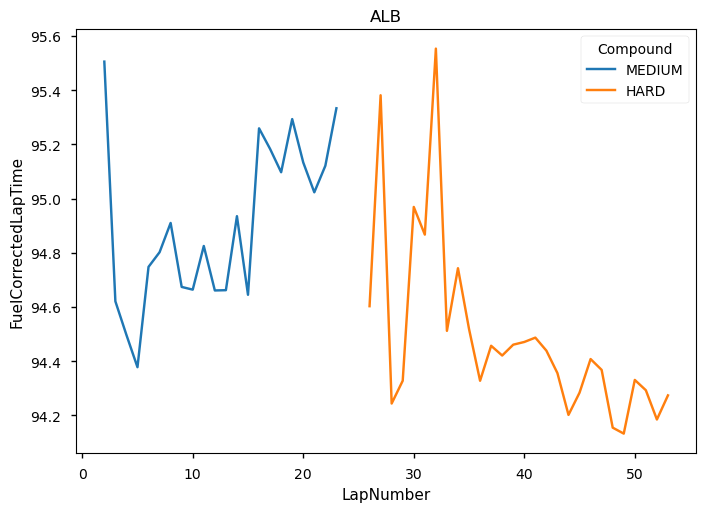

In [73]:
compare_stint_lap_times('ALB')

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_1815/3218945024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*0.06


(    Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 478    BEA           87 0 days 00:01:35.553000        2.0    1.0   MEDIUM   
 479    BEA           87 0 days 00:01:34.435000        3.0    1.0   MEDIUM   
 480    BEA           87 0 days 00:01:34.466000        4.0    1.0   MEDIUM   
 481    BEA           87 0 days 00:01:34.126000        5.0    1.0   MEDIUM   
 482    BEA           87 0 days 00:01:34.535000        6.0    1.0   MEDIUM   
 483    BEA           87 0 days 00:01:34.751000        7.0    1.0   MEDIUM   
 484    BEA           87 0 days 00:01:34.731000        8.0    1.0   MEDIUM   
 485    BEA           87 0 days 00:01:34.408000        9.0    1.0   MEDIUM   
 486    BEA           87 0 days 00:01:34.217000       10.0    1.0   MEDIUM   
 487    BEA           87 0 days 00:01:34.423000       11.0    1.0   MEDIUM   
 488    BEA           87 0 days 00:01:34.244000       12.0    1.0   MEDIUM   
 489    BEA           87 0 days 00:01:34.235000       13.0    1.

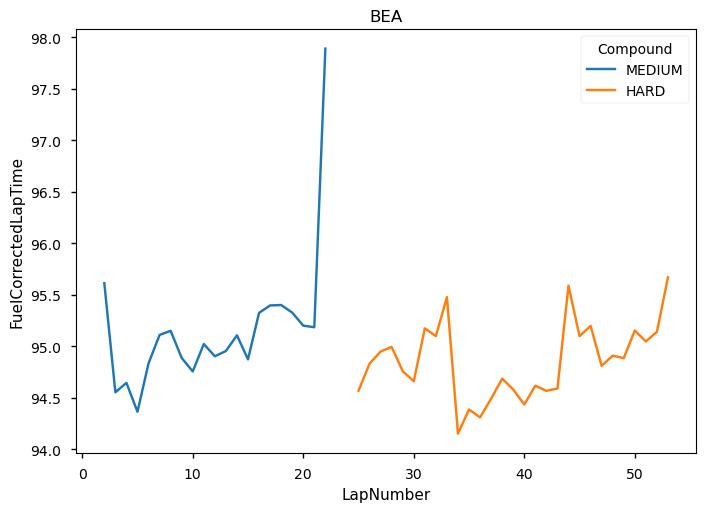

In [74]:
compare_stint_lap_times('BEA')

(    Driver DriverNumber                LapTime  LapNumber  Stint Compound  \
 319    HAM           44 0 days 00:01:35.275000        2.0    1.0     HARD   
 320    HAM           44 0 days 00:01:34.254000        3.0    1.0     HARD   
 321    HAM           44 0 days 00:01:34.147000        4.0    1.0     HARD   
 322    HAM           44 0 days 00:01:33.820000        5.0    1.0     HARD   
 323    HAM           44 0 days 00:01:33.941000        6.0    1.0     HARD   
 324    HAM           44 0 days 00:01:34.139000        7.0    1.0     HARD   
 325    HAM           44 0 days 00:01:33.912000        8.0    1.0     HARD   
 326    HAM           44 0 days 00:01:33.812000        9.0    1.0     HARD   
 327    HAM           44 0 days 00:01:33.522000       10.0    1.0     HARD   
 328    HAM           44 0 days 00:01:33.956000       11.0    1.0     HARD   
 329    HAM           44 0 days 00:01:34.033000       12.0    1.0     HARD   
 330    HAM           44 0 days 00:01:33.926000       13.0    1.

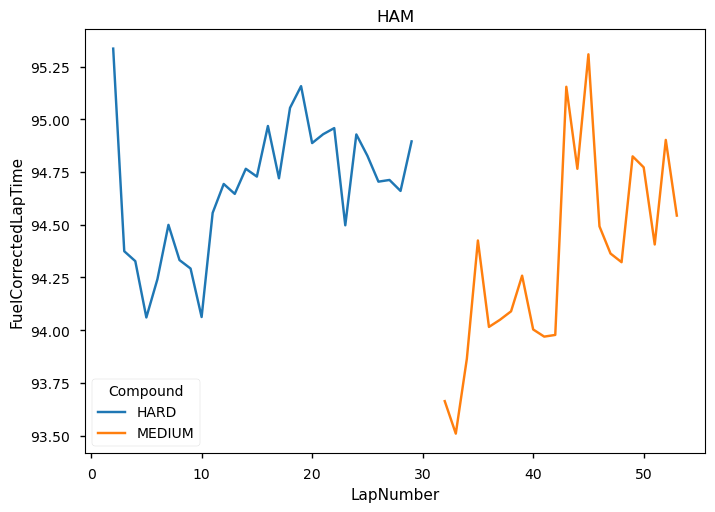

In [75]:
compare_stint_lap_times('HAM')

## Qualifying Ideal Lap Comparison

In [7]:
quali = fastf1.get_session(2025,'Japan','Qualifying')
quali.load()

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '6', '44', '23', '87', '10', '55', '14', '30', '22', '27', '5', '31', '7', '18']


In [8]:
quali_df = quali.laps

In [9]:
quali_df

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:18:27.472000,VER,1,NaT,1.0,1.0,0 days 00:16:26.862000,NaT,NaT,0 days 00:00:51.475000,...,True,Red Bull Racing,0 days 00:16:26.862000,2025-04-05 06:02:48.742,1,NaN,False,,False,False
1,0 days 00:19:55.832000,VER,1,0 days 00:01:28.360000,2.0,1.0,NaT,NaT,0 days 00:00:30.856000,0 days 00:00:40.015000,...,True,Red Bull Racing,0 days 00:18:27.472000,2025-04-05 06:04:49.352,1,NaN,False,,False,True
2,0 days 00:22:00.136000,VER,1,0 days 00:02:04.304000,3.0,1.0,NaT,0 days 00:21:58.895000,0 days 00:00:45.737000,0 days 00:00:52.077000,...,True,Red Bull Racing,0 days 00:19:55.832000,2025-04-05 06:06:17.712,1,NaN,False,,False,False
3,0 days 00:29:01.988000,VER,1,NaT,4.0,2.0,0 days 00:27:02.770000,NaT,NaT,0 days 00:00:51.956000,...,False,Red Bull Racing,0 days 00:22:00.136000,2025-04-05 06:08:22.016,1,NaN,False,,False,False
4,0 days 00:30:29.931000,VER,1,0 days 00:01:27.943000,5.0,2.0,NaT,NaT,0 days 00:00:30.696000,0 days 00:00:39.718000,...,False,Red Bull Racing,0 days 00:29:01.988000,2025-04-05 06:15:23.868,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0 days 00:19:08.366000,STR,18,NaT,1.0,1.0,0 days 00:17:09.143000,NaT,NaT,0 days 00:00:53.259000,...,True,Aston Martin,0 days 00:17:09.143000,2025-04-05 06:03:31.023,1,NaN,False,,False,False
288,0 days 00:20:37.637000,STR,18,0 days 00:01:29.271000,2.0,1.0,NaT,NaT,0 days 00:00:31.034000,0 days 00:00:40.483000,...,True,Aston Martin,0 days 00:19:08.366000,2025-04-05 06:05:30.246,1,NaN,False,,False,True
289,0 days 00:22:39.221000,STR,18,0 days 00:02:01.584000,3.0,1.0,NaT,0 days 00:22:37.161000,0 days 00:00:41.696000,0 days 00:00:52.011000,...,True,Aston Martin,0 days 00:20:37.637000,2025-04-05 06:06:59.517,1,NaN,False,,False,False
290,0 days 00:29:44.190000,STR,18,NaT,4.0,2.0,0 days 00:27:31.109000,NaT,NaT,0 days 00:00:52.607000,...,True,Aston Martin,0 days 00:22:39.221000,2025-04-05 06:09:01.101,1,NaN,False,,False,False


/Users/dario/Documents/Python Stuff/F1/utilities.py:284: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(custom_y_ticks_labels)


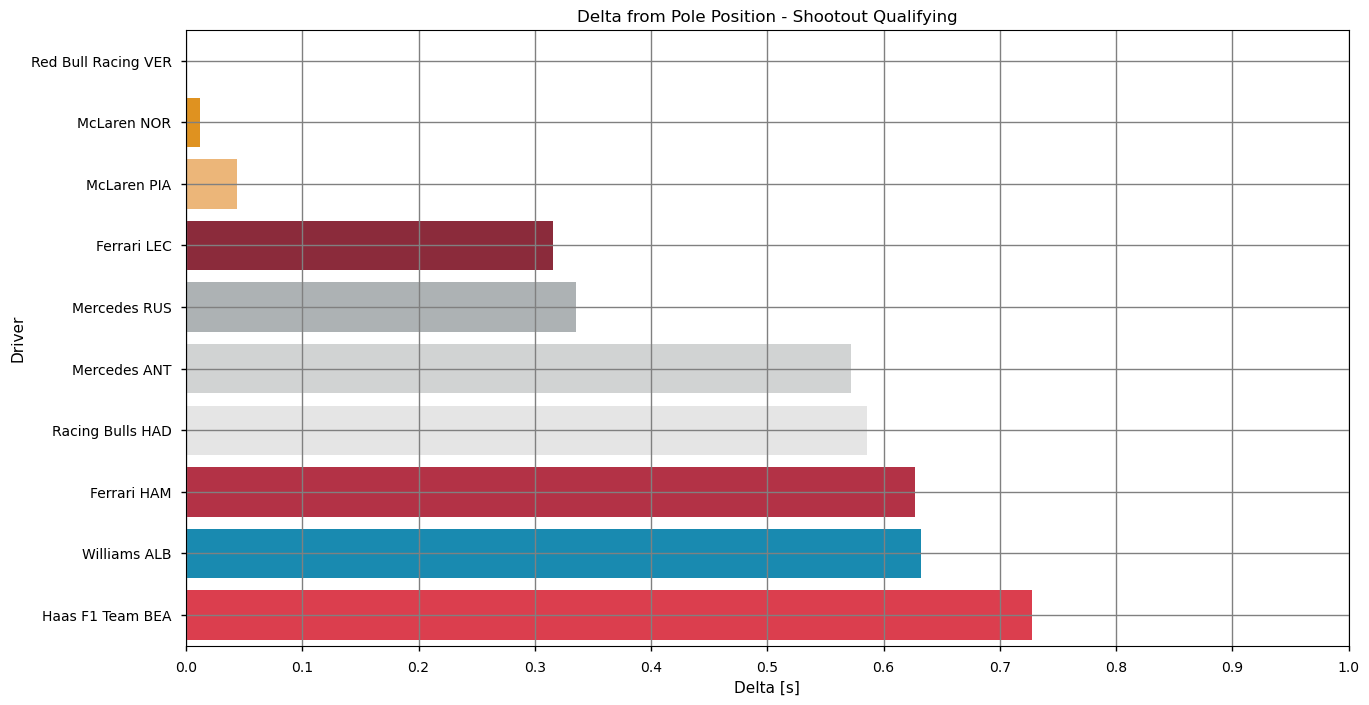

In [10]:
ut.delta_from_pole_chart(quali_df)

In [10]:
quali_df['LapTime'].isnull().sum()

107

In [11]:
quali_df = quali_df[quali_df['LapTime'].isnull()==False]
quali_df

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:19:55.832000,VER,1,0 days 00:01:28.360000,2.0,1.0,NaT,NaT,0 days 00:00:30.856000,0 days 00:00:40.015000,...,True,Red Bull Racing,0 days 00:18:27.472000,2025-04-05 06:04:49.352,1,NaN,False,,False,True
2,0 days 00:22:00.136000,VER,1,0 days 00:02:04.304000,3.0,1.0,NaT,0 days 00:21:58.895000,0 days 00:00:45.737000,0 days 00:00:52.077000,...,True,Red Bull Racing,0 days 00:19:55.832000,2025-04-05 06:06:17.712,1,NaN,False,,False,False
4,0 days 00:30:29.931000,VER,1,0 days 00:01:27.943000,5.0,2.0,NaT,NaT,0 days 00:00:30.696000,0 days 00:00:39.718000,...,False,Red Bull Racing,0 days 00:29:01.988000,2025-04-05 06:15:23.868,1,NaN,False,,False,True
5,0 days 00:32:20.580000,VER,1,0 days 00:01:50.649000,6.0,2.0,NaT,0 days 00:32:19.350000,0 days 00:00:40.294000,0 days 00:00:46.588000,...,False,Red Bull Racing,0 days 00:30:29.931000,2025-04-05 06:16:51.811,1,NaN,False,,False,False
7,0 days 00:42:06.030000,VER,1,0 days 00:01:27.502000,8.0,3.0,NaT,NaT,0 days 00:00:30.510000,0 days 00:00:39.641000,...,True,Red Bull Racing,0 days 00:40:38.528000,2025-04-05 06:27:00.408,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0 days 00:31:46.135000,DOO,7,0 days 00:01:29.024000,8.0,3.0,NaT,NaT,0 days 00:00:30.949000,0 days 00:00:40.467000,...,True,Alpine,0 days 00:30:17.111000,2025-04-05 06:16:38.991,1,NaN,False,,False,True
286,0 days 00:33:44.527000,DOO,7,0 days 00:01:58.392000,9.0,3.0,NaT,0 days 00:33:43.023000,0 days 00:00:46.457000,0 days 00:00:45.072000,...,True,Alpine,0 days 00:31:46.135000,2025-04-05 06:18:08.015,1,NaN,False,,False,False
288,0 days 00:20:37.637000,STR,18,0 days 00:01:29.271000,2.0,1.0,NaT,NaT,0 days 00:00:31.034000,0 days 00:00:40.483000,...,True,Aston Martin,0 days 00:19:08.366000,2025-04-05 06:05:30.246,1,NaN,False,,False,True
289,0 days 00:22:39.221000,STR,18,0 days 00:02:01.584000,3.0,1.0,NaT,0 days 00:22:37.161000,0 days 00:00:41.696000,0 days 00:00:52.011000,...,True,Aston Martin,0 days 00:20:37.637000,2025-04-05 06:06:59.517,1,NaN,False,,False,False


In [12]:
quali_df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [13]:
quali_df['LapTimeInSeconds'] = quali_df['LapTime'].dt.total_seconds()
quali_df['S1InSeconds'] = quali_df['Sector1Time'].dt.total_seconds()
quali_df['S2InSeconds'] = quali_df['Sector2Time'].dt.total_seconds()
quali_df['S3InSeconds'] = quali_df['Sector3Time'].dt.total_seconds()
quali_df.drop(columns=['LapTime','Sector1Time','Sector2Time','Sector3Time'],axis=1,inplace=True)

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_2251/289388701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quali_df['LapTimeInSeconds'] = quali_df['LapTime'].dt.total_seconds()
/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_2251/289388701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quali_df['S1InSeconds'] = quali_df['Sector1Time'].dt.total_seconds()
/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_2251/289388701.py:3: SettingWithCopyWarning: 
A value is tryin

In [14]:
quali_df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate', 'LapTimeInSeconds',
       'S1InSeconds', 'S2InSeconds', 'S3InSeconds'],
      dtype='object')

In [15]:
quali_df = quali_df[['Team','Driver','DriverNumber','LapNumber','S1InSeconds','S2InSeconds','S3InSeconds','LapTimeInSeconds']]
quali_df

,Team,Driver,DriverNumber,LapNumber,S1InSeconds,S2InSeconds,S3InSeconds,LapTimeInSeconds
1,Red Bull Racing,VER,1,2.0,30.856,40.015,17.489,88.360
2,Red Bull Racing,VER,1,3.0,45.737,52.077,26.490,124.304
4,Red Bull Racing,VER,1,5.0,30.696,39.718,17.529,87.943
5,Red Bull Racing,VER,1,6.0,40.294,46.588,23.767,110.649
7,Red Bull Racing,VER,1,8.0,30.510,39.641,17.351,87.502
...,...,...,...,...,...,...,...,...
285,Alpine,DOO,7,8.0,30.949,40.467,17.608,89.024
286,Alpine,DOO,7,9.0,46.457,45.072,26.863,118.392
288,Aston Martin,STR,18,2.0,31.034,40.483,17.754,89.271
289,Aston Martin,STR,18,3.0,41.696,52.011,27.877,121.584


In [16]:
quali_df['DriverNumber'] = quali_df['DriverNumber'].astype('int64')

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_2251/2294143061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quali_df['DriverNumber'] = quali_df['DriverNumber'].astype('int64')


In [17]:
quali_df.dtypes

Team                 object
Driver               object
DriverNumber          int64
LapNumber           float64
S1InSeconds         float64
S2InSeconds         float64
S3InSeconds         float64
LapTimeInSeconds    float64
dtype: object

In [18]:
quali_df[(quali_df['Driver']=='VER') & (quali_df['LapTimeInSeconds']==(quali_df[quali_df['Driver']=='VER']['LapTimeInSeconds'].min()))]

,Team,Driver,DriverNumber,LapNumber,S1InSeconds,S2InSeconds,S3InSeconds,LapTimeInSeconds
15,Red Bull Racing,VER,1,16.0,30.387,39.355,17.241,86.983


In [19]:
print(quali_df[quali_df['Driver']=='VER']['S1InSeconds'].idxmin(),quali_df[quali_df['Driver']=='VER']['S1InSeconds'].min())
print(quali_df[quali_df['Driver']=='VER']['S2InSeconds'].idxmin(),quali_df[quali_df['Driver']=='VER']['S2InSeconds'].min())
print(quali_df[quali_df['Driver']=='VER']['S2InSeconds'].idxmin(),quali_df[quali_df['Driver']=='VER']['S2InSeconds'].min())

15 30.387
15 39.355
15 39.355


In [20]:
quali_df[(quali_df['Driver']=='PIA') & (quali_df['LapTimeInSeconds']==(quali_df[quali_df['Driver']=='PIA']['LapTimeInSeconds'].min()))]

,Team,Driver,DriverNumber,LapNumber,S1InSeconds,S2InSeconds,S3InSeconds,LapTimeInSeconds
48,McLaren,PIA,81,17.0,30.625,39.197,17.205,87.027


In [21]:
print(quali_df[quali_df['Driver']=='PIA']['S1InSeconds'].idxmin(),quali_df[quali_df['Driver']=='PIA']['S1InSeconds'].min())
print(quali_df[quali_df['Driver']=='PIA']['S2InSeconds'].idxmin(),quali_df[quali_df['Driver']=='PIA']['S2InSeconds'].min())
print(quali_df[quali_df['Driver']=='PIA']['S2InSeconds'].idxmin(),quali_df[quali_df['Driver']=='PIA']['S2InSeconds'].min())

45 30.514
48 39.197
48 39.197


In [22]:
def get_ideal_lap(driver,input_df):
    '''
    To be used only after having created the columns S1InSeconds, S2InSeconds, S3InSeconds, LapTimeInSeconds 
    by applying .dt.total_seconds() to the corresponding columns
    Further required columns: Driver, DriverNumber, Team'''
    df = input_df[input_df['Driver']==driver]

    best_s1 = df['S1InSeconds'].min()
    best_s2 = df['S2InSeconds'].min()
    best_s3 = df['S3InSeconds'].min()
    best_lap = df['LapTimeInSeconds'].min()
    ideal_lap = best_s1+best_s2+best_s3
    improvement_margin = round(ideal_lap-best_lap,3)
    
    driver_number = df['DriverNumber'].iloc[1]
    team = df['Team'].iloc[1]

    result = {'Driver':driver,'DriverNumber':driver_number,'Team':team,'BestS1':best_s1,'BestS2':best_s2,'BestS3':best_s3,'BestLap':best_lap,'IdealLap':ideal_lap,'ImprovementMargin':improvement_margin}
    return result

In [23]:
improv_df = pd.DataFrame(columns=['Driver','DriverNumber','Team','BestS1','BestS2','BestS3','BestLap','IdealLap','ImprovementMargin'])
improv_df

,Driver,DriverNumber,Team,BestS1,BestS2,BestS3,BestLap,IdealLap,ImprovementMargin


In [24]:
pia_ideal = get_ideal_lap('PIA',quali_df)
pia_ideal

{'Driver': 'PIA',
 'DriverNumber': 81,
 'Team': 'McLaren',
 'BestS1': 30.514,
 'BestS2': 39.197,
 'BestS3': 17.205,
 'BestLap': 87.027,
 'IdealLap': 86.916,
 'ImprovementMargin': -0.111}

In [25]:
i=0
for driver in quali_df['Driver'].unique():
    ideal = get_ideal_lap(driver,quali_df)
    improv_df = pd.concat([improv_df,pd.DataFrame(ideal,columns=improv_df.columns,index=[i])])
    i+=1

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_2251/2700893654.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  improv_df = pd.concat([improv_df,pd.DataFrame(ideal,columns=improv_df.columns,index=[i])])


In [26]:
improv_df

,Driver,DriverNumber,Team,BestS1,BestS2,BestS3,BestLap,IdealLap,ImprovementMargin
0,VER,1,Red Bull Racing,30.387,39.355,17.241,86.983,86.983,-0.000
1,NOR,4,McLaren,30.358,39.301,17.307,86.995,86.966,-0.029
2,PIA,81,McLaren,30.514,39.197,17.205,87.027,86.916,-0.111
3,LEC,16,Ferrari,30.535,39.352,17.292,87.299,87.179,-0.120
4,RUS,63,Mercedes,30.376,39.560,17.281,87.318,87.217,-0.101
5,ANT,12,Mercedes,30.669,39.503,17.295,87.555,87.467,-0.088
6,HAD,6,Racing Bulls,30.663,39.471,17.401,87.569,87.535,-0.034
7,HAM,44,Ferrari,30.506,39.454,17.406,87.610,87.366,-0.244
8,ALB,23,Williams,30.604,39.581,17.399,87.615,87.584,-0.031
9,BEA,87,Haas F1 Team,30.646,39.639,17.403,87.711,87.688,-0.023


In [27]:
top10 = improv_df.sort_values(by='BestLap',ascending=True).iloc[0:10]
top10

,Driver,DriverNumber,Team,BestS1,BestS2,BestS3,BestLap,IdealLap,ImprovementMargin
0,VER,1,Red Bull Racing,30.387,39.355,17.241,86.983,86.983,-0.000
1,NOR,4,McLaren,30.358,39.301,17.307,86.995,86.966,-0.029
2,PIA,81,McLaren,30.514,39.197,17.205,87.027,86.916,-0.111
3,LEC,16,Ferrari,30.535,39.352,17.292,87.299,87.179,-0.120
4,RUS,63,Mercedes,30.376,39.560,17.281,87.318,87.217,-0.101
5,ANT,12,Mercedes,30.669,39.503,17.295,87.555,87.467,-0.088
6,HAD,6,Racing Bulls,30.663,39.471,17.401,87.569,87.535,-0.034
7,HAM,44,Ferrari,30.506,39.454,17.406,87.610,87.366,-0.244
8,ALB,23,Williams,30.604,39.581,17.399,87.615,87.584,-0.031
9,BEA,87,Haas F1 Team,30.646,39.639,17.403,87.711,87.688,-0.023


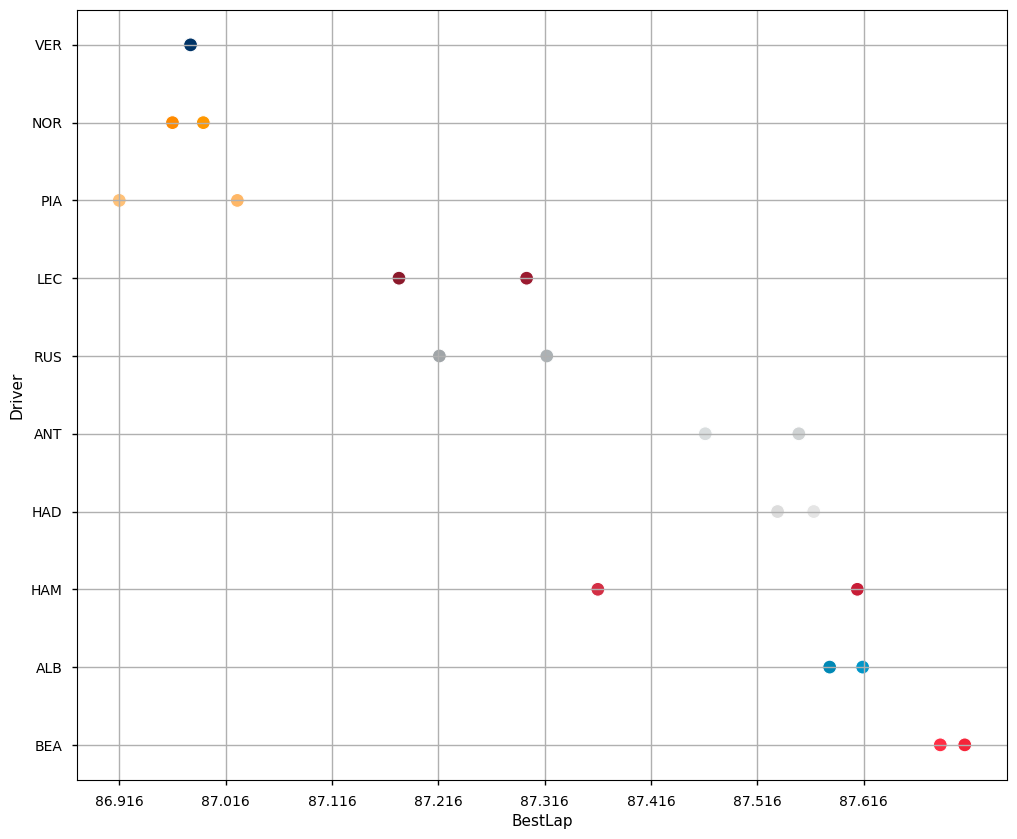

In [28]:
plt.figure(figsize=(12,10))
sns.scatterplot(top10,x='BestLap',y='Driver',hue='Driver',palette=driver_colors,legend=False,s=100)
sns.scatterplot(top10,x='IdealLap',y='Driver',hue='Driver',palette=ut.driver_colors_2,legend=False,s=100)
plt.xticks(np.arange(top10['IdealLap'].min(),top10['BestLap'].max(),0.1))
plt.grid(axis='both')

In [29]:
improv_df2 = ut.generate_improv_df(quali_df)
improv_df2.head()

/Users/dario/Documents/Python Stuff/F1/utilities.py:174: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  improv_df = pd.concat([improv_df,pd.DataFrame(ideal,columns=improv_df.columns,index=[i])])


,Driver,DriverNumber,Team,BestS1,BestS2,BestS3,BestLap,IdealLap,ImprovementMargin
0,VER,1,Red Bull Racing,30.387,39.355,17.241,86.983,86.983,-0.000
1,NOR,4,McLaren,30.358,39.301,17.307,86.995,86.966,-0.029
2,PIA,81,McLaren,30.514,39.197,17.205,87.027,86.916,-0.111
3,LEC,16,Ferrari,30.535,39.352,17.292,87.299,87.179,-0.120
4,RUS,63,Mercedes,30.376,39.560,17.281,87.318,87.217,-0.101


In [30]:
improv_df.head()

,Driver,DriverNumber,Team,BestS1,BestS2,BestS3,BestLap,IdealLap,ImprovementMargin
0,VER,1,Red Bull Racing,30.387,39.355,17.241,86.983,86.983,-0.000
1,NOR,4,McLaren,30.358,39.301,17.307,86.995,86.966,-0.029
2,PIA,81,McLaren,30.514,39.197,17.205,87.027,86.916,-0.111
3,LEC,16,Ferrari,30.535,39.352,17.292,87.299,87.179,-0.120
4,RUS,63,Mercedes,30.376,39.560,17.281,87.318,87.217,-0.101


In [31]:
help(ut.get_ideal_lap)

Help on function get_ideal_lap in module utilities:

get_ideal_lap(driver, input_df)
    Returns a dictionary containing anagraphic data of the driver plus the best sectors for the session, the best lap, and the ideal lap
    Required columns: Driver, DriverNumber, Team, S1InSeconds, S2InSeconds, S3InSeconds, LapTimeInSeconds



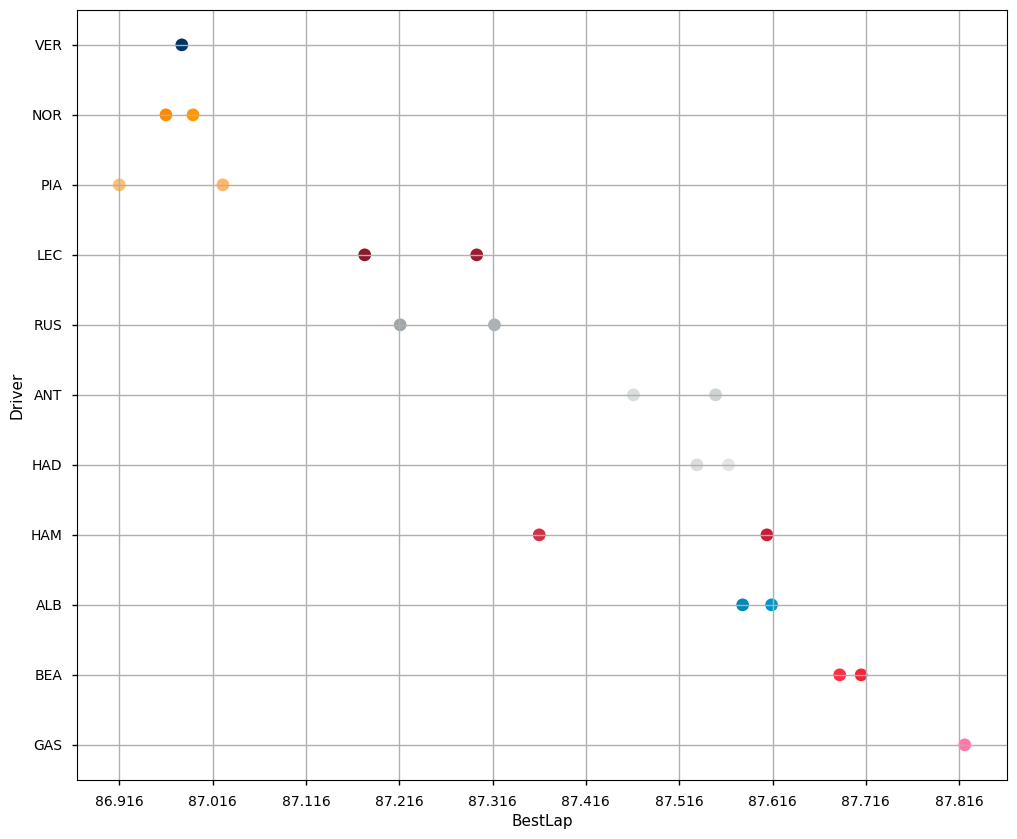

In [32]:
ut.ideal_lap_chart(improv_df,10)

## Race Test 'Utilities' stuff

In [7]:
race = fastf1.get_session(2025, 'Japan', 'R')
race.load()

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '44', '6', '23', '87', '14', '22', '10', '55', '7', '27', '30', '31', '5', '18']


In [8]:
race_df = race.laps
race_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:41.632000,VER,1,0 days 00:01:34.725000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.962000,...,True,Red Bull Racing,0 days 00:56:06.651000,2025-04-06 05:03:47.081,1,1.0,False,,False,False
1,0 days 00:59:15.575000,VER,1,0 days 00:01:33.943000,2.0,1.0,NaT,NaT,0 days 00:00:33.894000,0 days 00:00:42.026000,...,True,Red Bull Racing,0 days 00:57:41.632000,2025-04-06 05:05:22.062,1,1.0,False,,False,True
2,0 days 01:00:49.214000,VER,1,0 days 00:01:33.639000,3.0,1.0,NaT,NaT,0 days 00:00:33.567000,0 days 00:00:42.027000,...,True,Red Bull Racing,0 days 00:59:15.575000,2025-04-06 05:06:56.005,1,1.0,False,,False,True
3,0 days 01:02:22.958000,VER,1,0 days 00:01:33.744000,4.0,1.0,NaT,NaT,0 days 00:00:33.570000,0 days 00:00:42.140000,...,True,Red Bull Racing,0 days 01:00:49.214000,2025-04-06 05:08:29.644,1,1.0,False,,False,True
4,0 days 01:03:56.734000,VER,1,0 days 00:01:33.776000,5.0,1.0,NaT,NaT,0 days 00:00:33.486000,0 days 00:00:42.157000,...,True,Red Bull Racing,0 days 01:02:22.958000,2025-04-06 05:10:03.388,1,1.0,False,,False,True


In [9]:
dir(ut)

['GetGapsInRace',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'compare_stint_lap_times',
 'delta_from_pole_chart',
 'driver_colors',
 'driver_colors_2',
 'generate_improv_df',
 'generate_times_in_seconds',
 'get_ideal_lap',
 'ideal_lap_chart',
 'np',
 'one_hot_pit_laps',
 'pd',
 'plt',
 'position_switches_chart',
 'race_pace_chart',
 'race_pace_comparison_chart',
 'sns',
 'team_colors',
 'top_speed_comparison_chart']

In [10]:
help(ut.generate_times_in_seconds)

Help on function generate_times_in_seconds in module utilities:

generate_times_in_seconds(input_df)
    Generate 4 additional columns calculating Lap Time and each sector's time in seconds
    Required columns: LapTime, Sector1Time, Sector2Time, Sector3Time



In [11]:
race_df = ut.generate_times_in_seconds(race_df)
race_df.head()

,Time,Driver,DriverNumber,LapNumber,Stint,PitOutTime,PitInTime,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeInSeconds,S1InSeconds,S2InSeconds,S3InSeconds
0,0 days 00:57:41.632000,VER,1,1.0,1.0,NaT,NaT,NaT,0 days 00:57:23.704000,0 days 00:57:41.736000,...,1,1.0,False,,False,False,94.725,NaN,41.962,18.147
1,0 days 00:59:15.575000,VER,1,2.0,1.0,NaT,NaT,0 days 00:58:15.547000,0 days 00:58:57.573000,0 days 00:59:15.596000,...,1,1.0,False,,False,True,93.943,33.894,42.026,18.023
2,0 days 01:00:49.214000,VER,1,3.0,1.0,NaT,NaT,0 days 00:59:49.163000,0 days 01:00:31.190000,0 days 01:00:49.235000,...,1,1.0,False,,False,True,93.639,33.567,42.027,18.045
3,0 days 01:02:22.958000,VER,1,4.0,1.0,NaT,NaT,0 days 01:01:22.805000,0 days 01:02:04.945000,0 days 01:02:22.979000,...,1,1.0,False,,False,True,93.744,33.570,42.140,18.034
4,0 days 01:03:56.734000,VER,1,5.0,1.0,NaT,NaT,0 days 01:02:56.465000,0 days 01:03:38.622000,0 days 01:03:56.755000,...,1,1.0,False,,False,True,93.776,33.486,42.157,18.133


In [12]:
help(ut.race_pace_chart)

Help on function race_pace_chart in module utilities:

race_pace_chart(input_df)
    Plots race pace box plot per each driver in the grid
    Required columns: Driver, LapTimeInSeconds
    TO BE IMPROVED: Filter out pit laps



/Users/dario/Documents/Python Stuff/F1/utilities.py:210: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


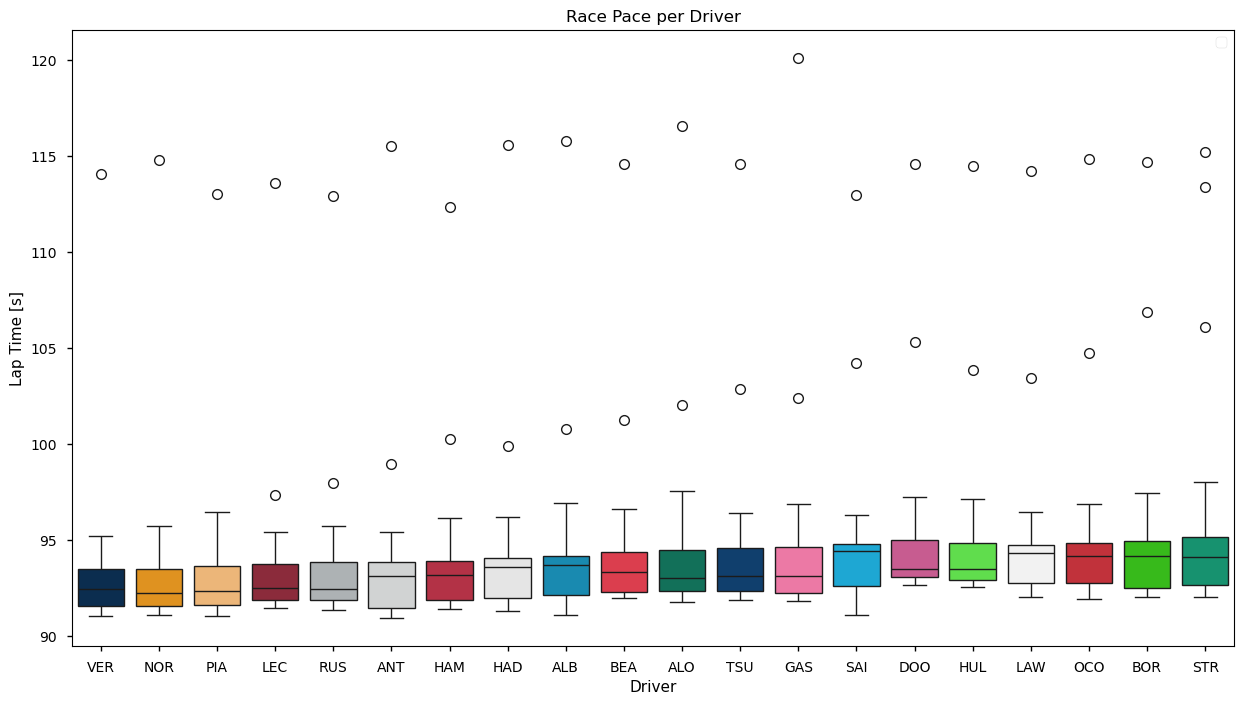

In [13]:
ut.race_pace_chart(race_df)

In [14]:
help(ut.race_pace_comparison_chart)

Help on function race_pace_comparison_chart in module utilities:

race_pace_comparison_chart(input_df, drv1, drv2)
    Plots race pace comparison trendlines for two drivers
    Required columns: Driver, LapNumber, LapTimeInSeconds
    TO BE IMPROVED: Caculate yticks dinamically
    TO BE IMPROVED: Filter out pit laps (probably do another function directly as you need this for more functions)



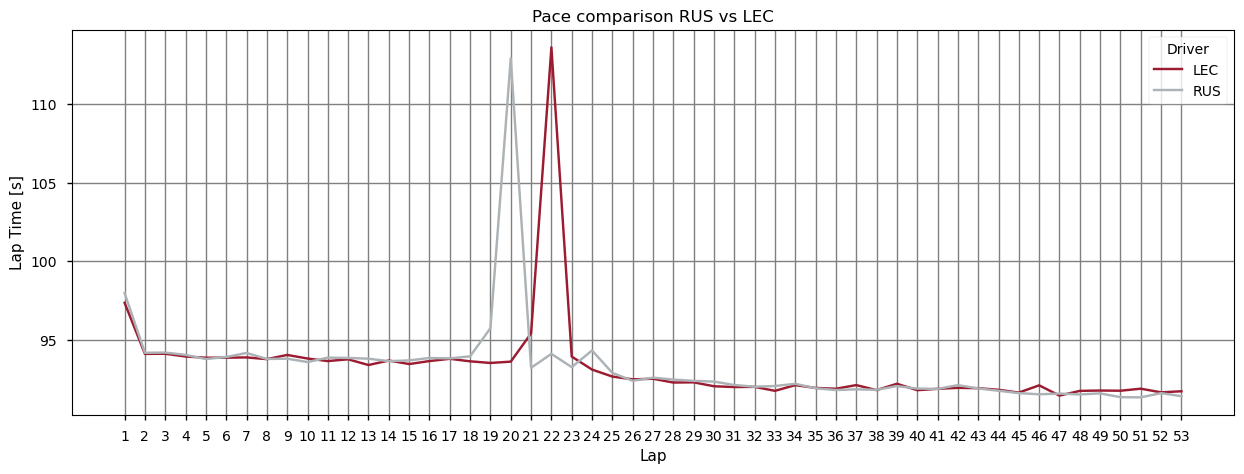

In [15]:
ut.race_pace_comparison_chart(race_df,'RUS','LEC')

In [16]:
help(ut.top_speed_comparison_chart)

Help on function top_speed_comparison_chart in module utilities:

top_speed_comparison_chart(input_df)
    Plots top speed comparison
    Required columns: Driver, SpeedST



/Users/dario/Documents/Python Stuff/F1/utilities.py:237: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=input_df.groupby('Driver')['SpeedST'].max().sort_values(ascending=False),palette=driver_colors)


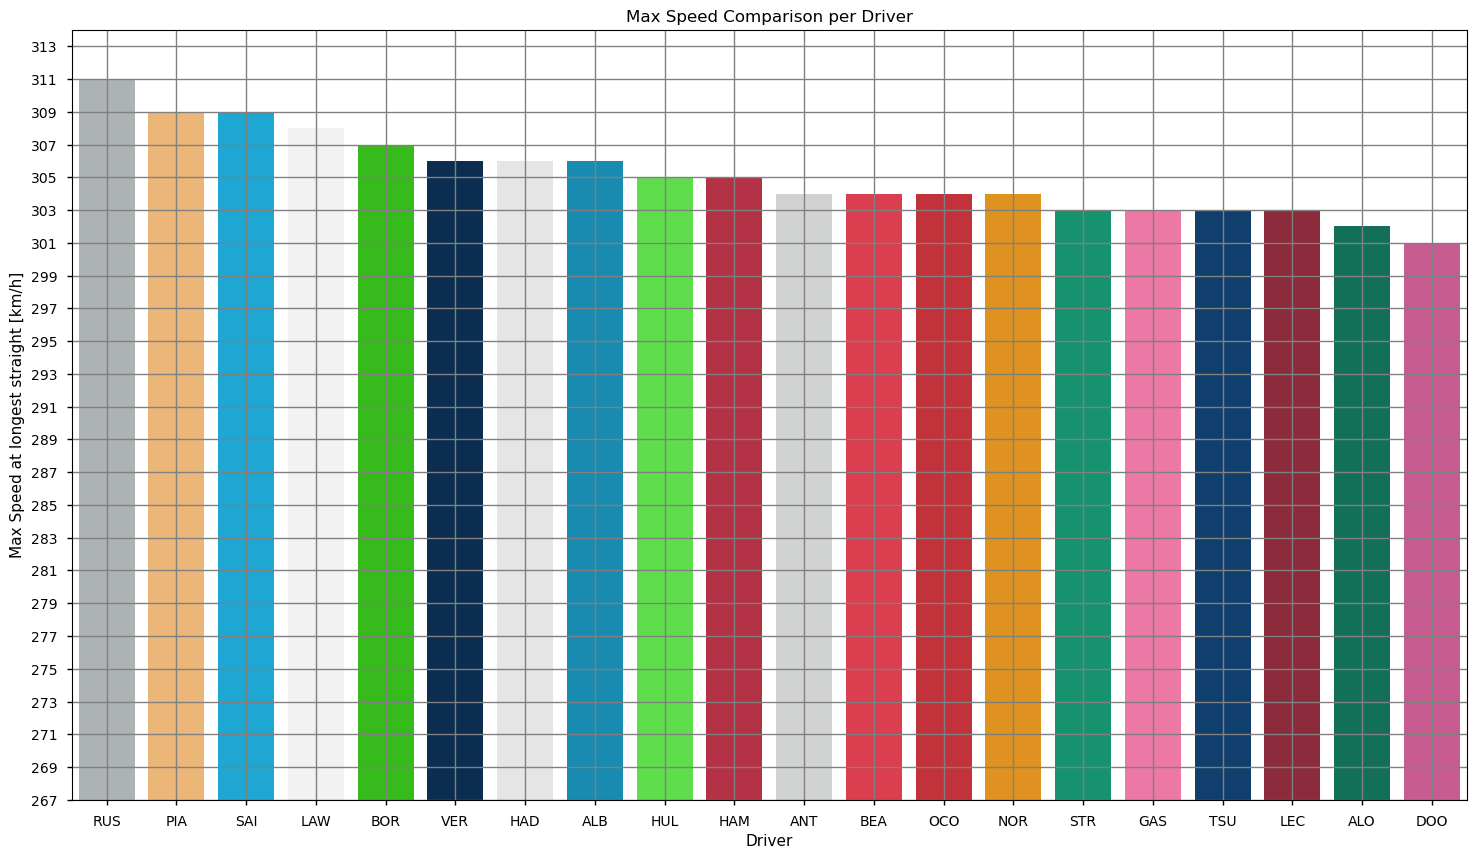

In [17]:
ut.top_speed_comparison_chart(race_df)

In [18]:
help(ut.position_switches_chart)

Help on function position_switches_chart in module utilities:

position_switches_chart(input_df)
    Plots position changes during the race
    Required columns: LapNumber, Position, Driver



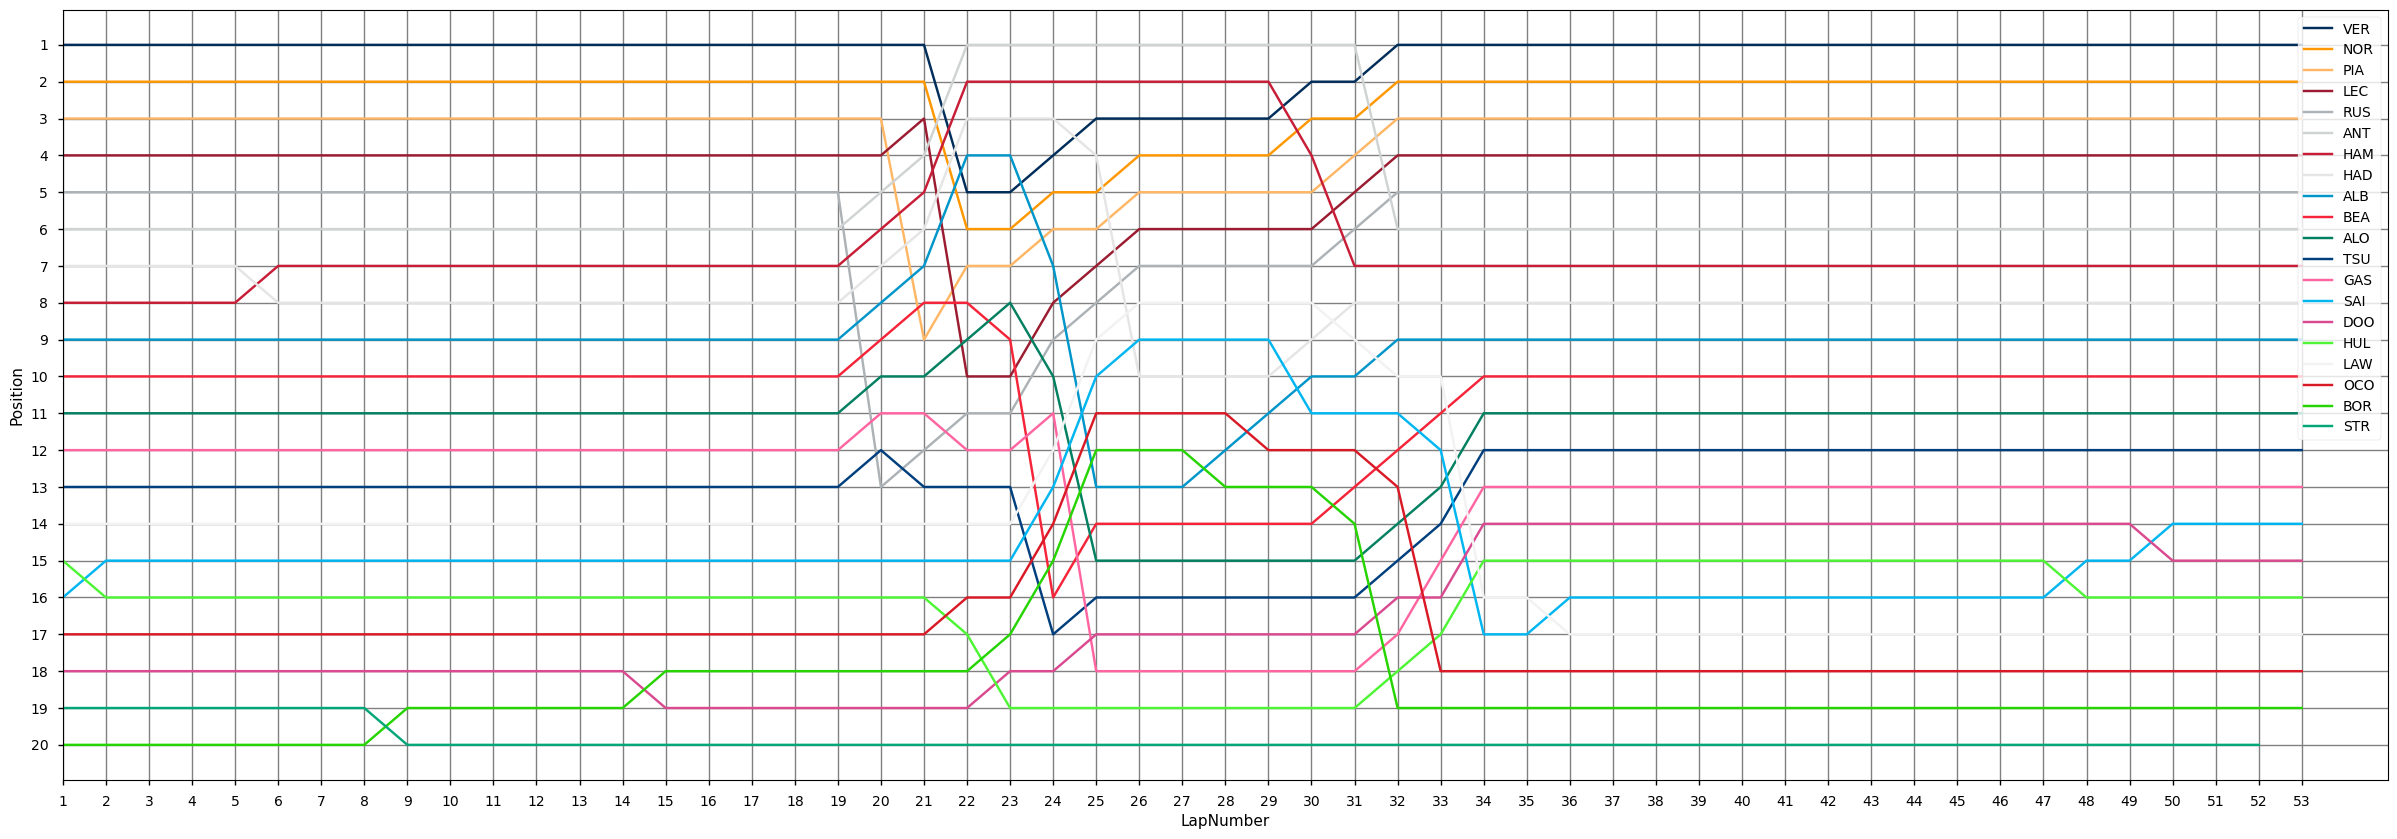

In [19]:
ut.position_switches_chart(race_df)

In [20]:
help(ut.one_hot_pit_laps)

Help on function one_hot_pit_laps in module utilities:

one_hot_pit_laps(input_df)
    Returns a new column called "PitLap" with value 1 if during that lap there has been a pit (either getting in or going out of the pitlane), else 0.
    Required columns: PitInTime, PitOutTime



In [21]:
ut.one_hot_pit_laps(race_df)
race_df.sample(20)

,Time,Driver,DriverNumber,LapNumber,Stint,PitOutTime,PitInTime,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,...,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeInSeconds,S1InSeconds,S2InSeconds,S3InSeconds,PitLap
127,0 days 01:30:51.957000,PIA,81,22.0,2.0,NaT,NaT,0 days 01:29:51.508000,0 days 01:30:33.740000,0 days 01:30:51.996000,...,7.0,False,,False,True,93.844,33.356,42.232,18.256,0
371,0 days 00:57:46.831000,HAD,6,1.0,1.0,NaT,NaT,NaT,0 days 00:57:28.689000,0 days 00:57:46.954000,...,7.0,False,,False,False,99.924,NaN,43.484,18.244,0
99,0 days 02:09:07.312000,NOR,4,47.0,2.0,NaT,NaT,0 days 02:08:07.621000,0 days 02:08:49.469000,0 days 02:09:07.357000,...,2.0,False,,False,True,91.364,31.628,41.848,17.888,0
1019,0 days 01:17:20.232000,STR,18,13.0,2.0,NaT,NaT,0 days 01:16:19.156000,0 days 01:17:02.005000,0 days 01:17:20.266000,...,20.0,False,,False,True,95.153,34.043,42.849,18.261,0
872,0 days 01:35:44.921000,LAW,30,25.0,1.0,NaT,NaT,0 days 01:34:43.927000,0 days 01:35:26.736000,0 days 01:35:44.976000,...,9.0,False,,False,True,94.116,33.067,42.809,18.240,0
166,0 days 01:08:41.923000,LEC,16,8.0,1.0,NaT,NaT,0 days 01:07:41.368000,0 days 01:08:23.896000,0 days 01:08:41.967000,...,4.0,False,,False,True,93.787,33.188,42.528,18.071,0
152,0 days 02:09:08.146000,PIA,81,47.0,2.0,NaT,NaT,0 days 02:08:08.510000,0 days 02:08:50.213000,0 days 02:09:08.185000,...,3.0,False,,False,True,91.222,31.547,41.703,17.972,0
887,0 days 01:59:31.774000,LAW,30,40.0,2.0,NaT,NaT,0 days 01:58:31.891000,0 days 01:59:13.892000,0 days 01:59:31.829000,...,17.0,False,,False,True,92.430,32.492,42.001,17.937,0
594,0 days 01:15:12.720000,TSU,22,12.0,1.0,NaT,NaT,0 days 01:14:11.726000,0 days 01:14:54.508000,0 days 01:15:12.772000,...,13.0,False,,False,True,94.427,33.381,42.782,18.264,0
49,0 days 02:13:40.116000,VER,1,50.0,2.0,NaT,NaT,0 days 02:12:40.254000,0 days 02:13:22.140000,0 days 02:13:40.137000,...,1.0,False,,False,True,91.364,31.481,41.886,17.997,0


In [22]:
help(ut.compare_stint_lap_times)

Help on function compare_stint_lap_times in module utilities:

compare_stint_lap_times(input_df, drv, fuel_coeff=0.06)
    Returns df and chart with comparison of lap times between stints for a given driver
    Accepts a fuel_coefficient drag that adds incrementally to each lap time to take into account fuel tank weight reduction
        Default: 0.06s
    Required columns: Driver, LapNumber, PitLap, LapTimeInSeconds



/Users/dario/Documents/Python Stuff/F1/utilities.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelCorrectedLapTime'] = df['LapTimeInSeconds']+(df['LapNumber']-1)*fuel_coeff


,Time,Driver,DriverNumber,LapNumber,Stint,PitOutTime,PitInTime,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,...,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeInSeconds,S1InSeconds,S2InSeconds,S3InSeconds,PitLap,FuelCorrectedLapTime
1,0 days 00:59:15.575000,VER,1,2.0,1.0,NaT,NaT,0 days 00:58:15.547000,0 days 00:58:57.573000,0 days 00:59:15.596000,...,False,,False,True,93.943,33.894,42.026,18.023,0,94.003
2,0 days 01:00:49.214000,VER,1,3.0,1.0,NaT,NaT,0 days 00:59:49.163000,0 days 01:00:31.190000,0 days 01:00:49.235000,...,False,,False,True,93.639,33.567,42.027,18.045,0,93.759
3,0 days 01:02:22.958000,VER,1,4.0,1.0,NaT,NaT,0 days 01:01:22.805000,0 days 01:02:04.945000,0 days 01:02:22.979000,...,False,,False,True,93.744,33.570,42.140,18.034,0,93.924
4,0 days 01:03:56.734000,VER,1,5.0,1.0,NaT,NaT,0 days 01:02:56.465000,0 days 01:03:38.622000,0 days 01:03:56.755000,...,False,,False,True,93.776,33.486,42.157,18.133,0,94.016
5,0 days 01:05:30.380000,VER,1,6.0,1.0,NaT,NaT,0 days 01:04:30.074000,0 days 01:05:12.326000,0 days 01:05:30.401000,...,False,,False,True,93.646,33.319,42.252,18.075,0,93.946


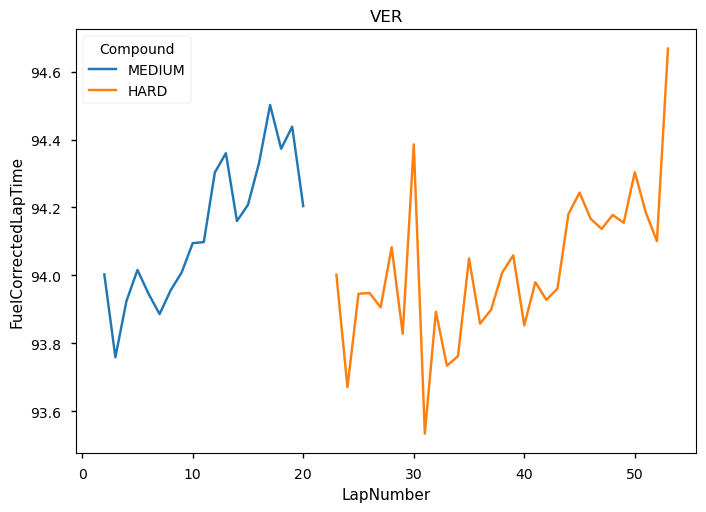

In [32]:
test_df, test_chart = ut.compare_stint_lap_times(race_df,'VER',0.06)
test_df.head()